<a href="https://colab.research.google.com/github/ParbatiDebbarma/Delhivery-FeatureEngineering/blob/main/Business_Case_Delhivery_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Case: Delhivery - Feature Engineering**

---



 **About Delhivery**

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

**Business Problem**


The company wants to understand and process the data coming out of data engineering pipelines:

- Clean, sanitize and manipulate data to get useful features out of raw fields

- Make sense out of the raw data and help the data science team to build forecasting models on it.


**Column Profiling:**


---



**data** - tells whether the data is testing or training data

**trip_creation_time –** Timestamp of trip creation

**route_schedule_uuid –** Unique Id for a particular route schedule

**route_type –** Transportation type

**FTL –** Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way

**Carting:** Handling system consisting of small vehicles (carts)


**trip_uuid -** Unique ID given to a particular trip (A trip may include different source and destination centers)

**source_center** - Source ID of trip origin

**source_name -** Source Name of trip origin

**destination_cente –** Destination ID

**destination_name –** Destination Name

**od_start_time –** Trip start time

**od_end_time –** Trip end time

**start_scan_to_end_scan**– Time taken to deliver from source to destination

**is_cutoff –** Unknown field

**cutoff_factor –** Unknown field

**cutoff_timestamp –** Unknown field

**actual_distance_to_destination –** Distance in Kms between source and destination warehouse

**actual_time –** Actual time taken to complete the delivery (Cumulative)

**osrm_time –** An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)

**osrm_distance –** An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)

**factor –** Unknown field

**segment_actual_time –** This is a segment time. Time taken by the subset of the package delivery

**segment_osrm_time –** This is the OSRM segment time. Time taken by the subset of the package delivery

**segment_osrm_distance –** This is the OSRM distance. Distance covered by subset of the package delivery

**segment_factor –** Unknown field

In [ ]:
#importing all modules for the analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as spy

In [ ]:
# Importing the warnings module to manage warning messages
import warnings
warnings.simplefilter('ignore')

In [ ]:
df = pd.read_csv('delhivery_data.csv')
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


# **Data Exploration**

---



In [ ]:
#No. of Rows and Columns in the dataset
print(f'No. of Rows: {df.shape[0]}\nNo. of Columns : {df.shape[1]}')

No. of Rows: 144867
No. of Columns : 24


In [ ]:
#The column name in the datatset
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

The dataset(before transformation) has about 12 columns of objects, 10 columns of float values, 1 column of integers and lastly one column consisitng of boolean values.

In [ ]:
np.any(df.isnull())  #checking for null values

True

There are null values in the datatset

In [ ]:
df.duplicated().sum() #checking for duplicate values

0

There are no duplicates in the dataset

In [ ]:
# Dropping unknown fields

unknown_fields = ['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor']
df = df.drop(columns = unknown_fields)

In [ ]:
df.describe() #checking for statistical summary

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000
mean,961.262986,234.073372,416.927527,213.868272,284.771297,36.196111,18.507548,22.82902
std,1037.012769,344.990009,598.103621,308.011085,421.119294,53.571158,14.775960,17.86066
min,20.000000,9.000045,9.000000,6.000000,9.008200,-244.000000,0.000000,0.00000
25%,161.000000,23.355874,51.000000,27.000000,29.914700,20.000000,11.000000,12.07010
50%,449.000000,66.126571,132.000000,64.000000,78.525800,29.000000,17.000000,23.51300
75%,1634.000000,286.708875,513.000000,257.000000,343.193250,40.000000,22.000000,27.81325
max,7898.000000,1927.447705,4532.000000,1686.000000,2326.199100,3051.000000,1611.000000,2191.40370


- Clearly, integer & floating value columns have no null values.
- The dataset contains several potential outliers, such as the segment_actual_time having a minimum value of -244, which is likely an error or anomaly.
- Additionally, start_scan_to_end_scan and cutoff_factor have extremely high maximum values (7898 and 1927, respectively), far exceeding the typical range. These outliers should be investigated and possibly treated to ensure accurate analysis.

In [ ]:
#checking the unique values for columns
for _ in df.columns:
    print()
    print(f'Total Unique Values in {_} column are :- {df[_].nunique()}')
    print(f'Unique Values in {_} column are :-\n {df[_].unique()}')
    print()
    print('-'*120)


Total Unique Values in data column are :- 2
Unique Values in data column are :-
 ['training' 'test']

------------------------------------------------------------------------------------------------------------------------

Total Unique Values in trip_creation_time column are :- 14817
Unique Values in trip_creation_time column are :-
 ['2018-09-20 02:35:36.476840' '2018-09-23 06:42:06.021680'
 '2018-09-14 15:42:46.437249' ... '2018-09-22 11:30:41.399439'
 '2018-09-17 11:35:28.838714' '2018-09-20 16:24:28.436231']

------------------------------------------------------------------------------------------------------------------------

Total Unique Values in route_schedule_uuid column are :- 1504
Unique Values in route_schedule_uuid column are :-
 ['thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3297ef'
 'thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc211728881b'
 'thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d315e6' ...
 'thanos::sroute:72cf9feb-f4e3-4a55-b92a-0b686ee8fabc'
 'thanos::sroute:5e

In [ ]:
df.describe(include = 'object') #checking for statistical summary of object type columns

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,144867
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,26369
top,training,2018-09-28 05:23:15.359220,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,81


# **Data Transformation**


---



In [ ]:
#Changing datatypes of the columns to categorical as they contain only 2 unique values
df['data'] = df['data'].astype('category')
df['route_type'] = df['route_type'].astype('category')

In [ ]:
floats = ['actual_distance_to_destination','actual_time',
          'osrm_time','osrm_distance','segment_actual_time',
          'segment_osrm_time','segment_osrm_distance', 'start_scan_to_end_scan']
for i in floats:
    df[i] = df[i].astype('float32')

In [ ]:
#Changing datatypes of columns into date-time
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])

In [ ]:
df.info() #checking the datatypes of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

**Memory Optimization** : Earlier the dataset was using 25.6+ MB of memory but now it has been reduced to 14.6 + MB. Around 42.97% reduction in the memory usage.

# **Data Cleaning**

---



In [ ]:
df.isnull().sum() #checking for null values

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


The columns **source_name** and **destination_name** has **293** and **261** **Null** values respectively

In [ ]:
null_source = df.loc[df['source_name'].isnull(),'source_center'].value_counts()
null_source

,count
source_center,
IND282002AAD,128
IND342902A1B,90
IND126116AAA,20
IND509103AAC,17
IND577116AAA,16
IND465333A1B,6
IND841301AAC,5
IND505326AAB,5
IND331022A1B,3


In [ ]:
#finding the source_centers with corresponding null source-name
null_source = df.loc[df['source_name'].isnull(), 'source_center'].unique()
null_source

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND509103AAC', 'IND126116AAA', 'IND331022A1B',
       'IND505326AAB', 'IND852118A1B'], dtype=object)

In [ ]:
for i in null_source:
    # Getting unique source names for the given source_center
    unique_source_name = df.loc[df['source_center'] == i, 'source_name'].unique()

    # Checking if the first element in the array is NaN (if it's null, the first element should be NaN)
    if pd.isna(unique_source_name[0]):
        print("Source Center :", i, "-" * 10, "Source Name :", 'Not Found')

        # Replacing the null values in source_name for the current source_center
        df.loc[df['source_center'] == i, 'source_name'] = 'Not Found'
    else:
        print("Source Center :", i, "-" * 10, "Source Name :", unique_source_name)

Source Center : IND342902A1B ---------- Source Name : Not Found
Source Center : IND577116AAA ---------- Source Name : Not Found
Source Center : IND282002AAD ---------- Source Name : Not Found
Source Center : IND465333A1B ---------- Source Name : Not Found
Source Center : IND841301AAC ---------- Source Name : Not Found
Source Center : IND509103AAC ---------- Source Name : Not Found
Source Center : IND126116AAA ---------- Source Name : Not Found
Source Center : IND331022A1B ---------- Source Name : Not Found
Source Center : IND505326AAB ---------- Source Name : Not Found
Source Center : IND852118A1B ---------- Source Name : Not Found


In [ ]:
null_destination = df.loc[df['destination_name'].isnull(), 'destination_center'].unique()
null_destination

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND505326AAB', 'IND852118A1B', 'IND126116AAA',
       'IND509103AAC', 'IND221005A1A', 'IND250002AAC', 'IND331001A1C',
       'IND122015AAC'], dtype=object)

In [ ]:
for i in null_destination:
    # Getting unique destination names for the given distance_center
    unique_destination_name = df.loc[df['destination_center'] == i, 'destination_name'].unique()

    # Checking if the first element in the array is NaN (if it's null, the first element should be NaN)
    if pd.isna(unique_destination_name[0]):
        print("Destination Center :", i, "-" * 10, "Destination Name :", 'Not Found')

        # Replacing the null values in destination_name for the current destination_center
        df.loc[df['destination_center'] == i, 'destination_name'] = 'Not Found'
    else:
        print("Destination Center :", i, "-" * 10, "Destination Name :", unique_destination_name)

Destination Center : IND342902A1B ---------- Destination Name : Not Found
Destination Center : IND577116AAA ---------- Destination Name : Not Found
Destination Center : IND282002AAD ---------- Destination Name : Not Found
Destination Center : IND465333A1B ---------- Destination Name : Not Found
Destination Center : IND841301AAC ---------- Destination Name : Not Found
Destination Center : IND505326AAB ---------- Destination Name : Not Found
Destination Center : IND852118A1B ---------- Destination Name : Not Found
Destination Center : IND126116AAA ---------- Destination Name : Not Found
Destination Center : IND509103AAC ---------- Destination Name : Not Found
Destination Center : IND221005A1A ---------- Destination Name : Not Found
Destination Center : IND250002AAC ---------- Destination Name : Not Found
Destination Center : IND331001A1C ---------- Destination Name : Not Found
Destination Center : IND122015AAC ---------- Destination Name : Not Found


In [ ]:
df.isnull().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,0
destination_center,0
destination_name,0
od_start_time,0


In [ ]:
np.any(df.isnull())

False

In [ ]:
df.describe()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144867,144867,144867,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000
mean,2018-09-22 13:34:23.659819264,2018-09-22 18:02:45.855230720,2018-09-23 10:04:31.395393024,961.262939,234.073380,416.927521,213.868286,284.771301,36.196110,18.507547,22.829018
min,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,20.000000,9.000046,9.000000,6.000000,9.008200,-244.000000,0.000000,0.000000
25%,2018-09-17 03:20:51.775845888,2018-09-17 08:05:40.886155008,2018-09-18 01:48:06.410121984,161.000000,23.355875,51.000000,27.000000,29.914701,20.000000,11.000000,12.070100
50%,2018-09-22 04:24:27.932764928,2018-09-22 08:53:00.116656128,2018-09-23 03:13:03.520212992,449.000000,66.126572,132.000000,64.000000,78.525803,29.000000,17.000000,23.513000
75%,2018-09-27 17:57:56.350054912,2018-09-27 22:41:50.285857024,2018-09-28 12:49:06.054018048,1634.000000,286.708878,513.000000,257.000000,343.193253,40.000000,22.000000,27.813250
max,2018-10-03 23:59:42.701692,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,7898.000000,1927.447754,4532.000000,1686.000000,2326.199219,3051.000000,1611.000000,2191.403809
std,NaN,NaN,NaN,1037.012817,344.990021,598.103638,308.011078,421.119293,53.571156,14.775960,17.860661


In [ ]:
df.describe(include='object')

,route_schedule_uuid,trip_uuid,source_center,source_name,destination_center,destination_name
count,144867,144867,144867,144867,144867,144867
unique,1504,14817,1508,1499,1481,1469
top,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana)
freq,1812,101,23347,23347,15192,15192


# **Exploratory Data Analysis**

In [ ]:
df['data'].value_counts()

,count
data,
training,104858
test,40009


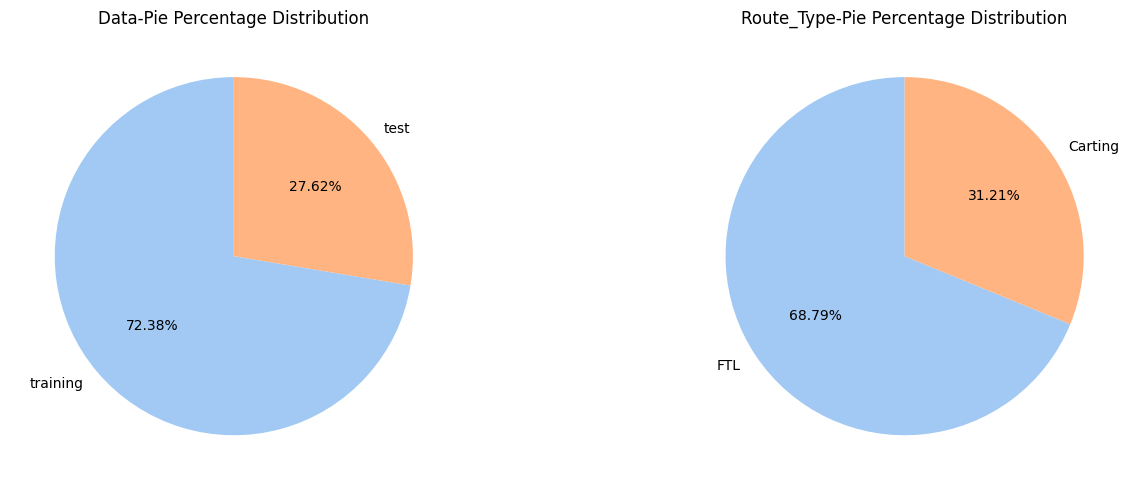

In [ ]:
# Defining pastel colors for the plots
pastel_colors = sns.color_palette("pastel")

# Setting the figure size
plt.figure(figsize=(15, 5))

# Creating a pie chart for the 'data' column distribution
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
data_counts = df['data'].value_counts()
plt.pie(data_counts, labels=data_counts.index, autopct='%1.2f%%', colors=pastel_colors, startangle=90)
plt.title('Data-Pie Percentage Distribution')


# Creating a pie chart for the 'route_type' column distribution
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
route_type_counts = df['route_type'].value_counts()
plt.pie(route_type_counts, labels=route_type_counts.index, autopct='%1.2f%%', colors=pastel_colors, startangle=90)
plt.title('Route_Type-Pie Percentage Distribution')

# Adjusting layout and display the plots
plt.tight_layout()
plt.show()

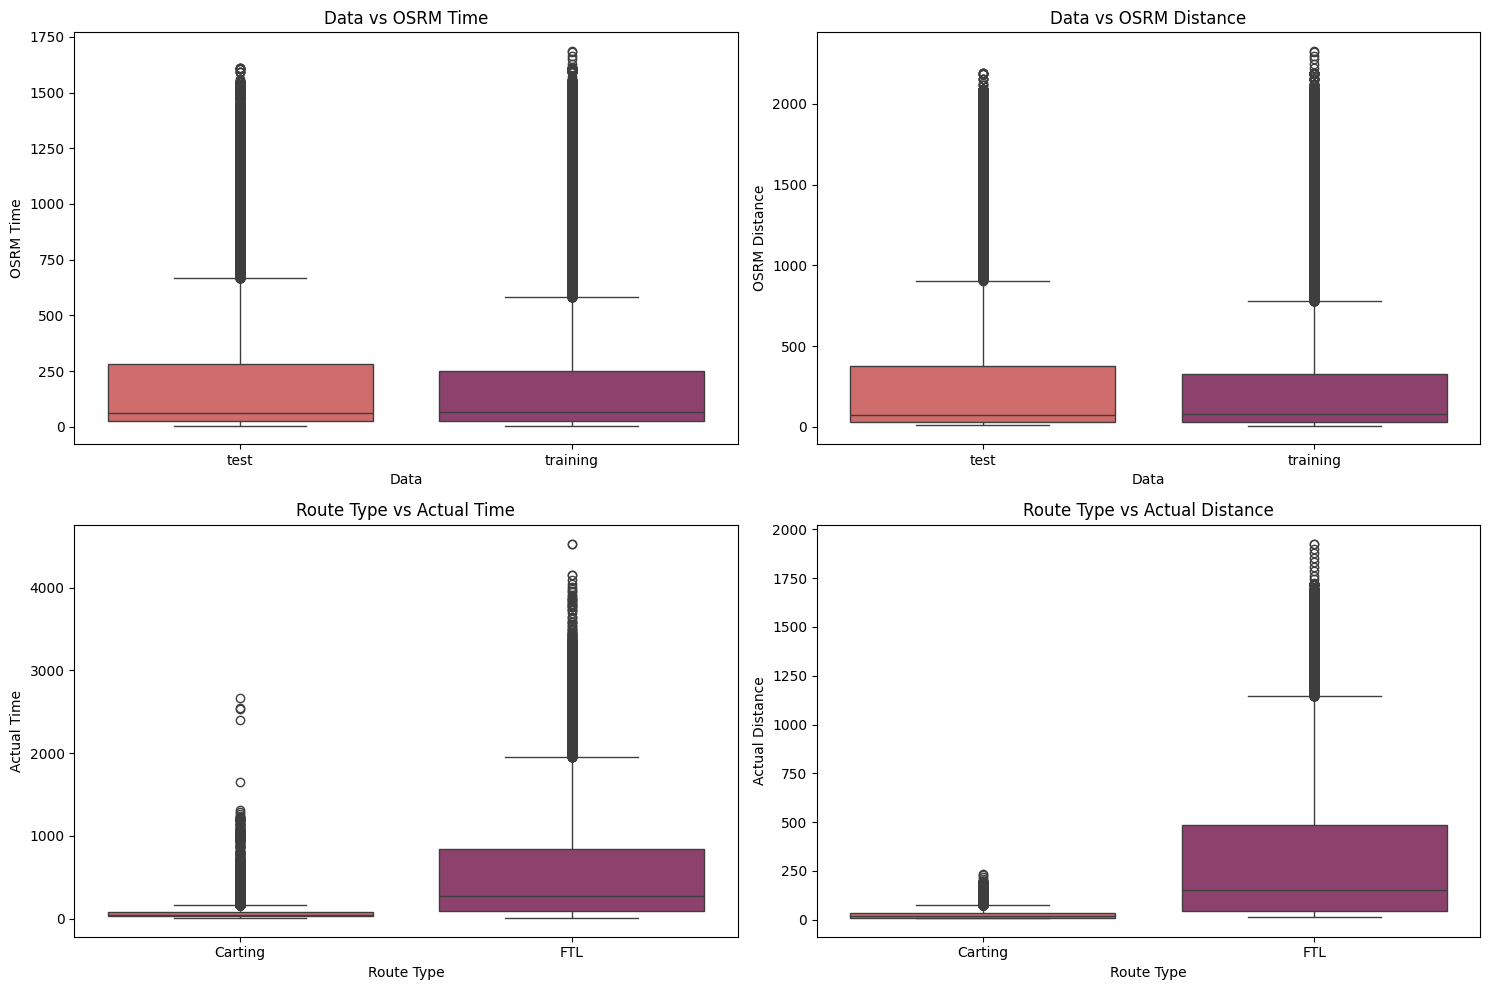

In [ ]:
plt.figure(figsize=(15, 10))


# Subplot 1: Boxplot of 'data' vs 'osrm_time'
plt.subplot(2, 2, 1)
sns.boxplot(x='data', y='osrm_time', data=df, palette='flare')
plt.title('Data vs OSRM Time')
plt.ylabel('OSRM Time')
plt.xlabel('Data')

# Subplot 2: Boxplot of 'data' vs 'osrm_time'
plt.subplot(2, 2, 2)
sns.boxplot(x='data', y='osrm_distance', data=df, palette='flare')
plt.title('Data vs OSRM Distance')
plt.ylabel('OSRM Distance')
plt.xlabel('Data')

# Subplot 3: Boxplot of 'route_type' vs 'actual_time'
plt.subplot(2, 2, 3)
sns.boxplot(x='route_type', y='actual_time', data=df, palette='flare')
plt.title('Route Type vs Actual Time')
plt.ylabel('Actual Time')
plt.xlabel('Route Type')

# Subplot 4: Boxplot of 'route_type' vs 'osrm_time'
plt.subplot(2, 2, 4)
sns.boxplot(x='route_type', y='actual_distance_to_destination', data=df, palette='flare')
plt.title('Route Type vs Actual Distance')
plt.ylabel('Actual Distance')
plt.xlabel('Route Type')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

**Observations:**

- The range of OSRM time recorded is consistent across both the training and test datasets.

- FTL routes tend to have longer actual times compared to Carting, which may be attributed to the higher usage of FTL routes in the available dataset.

- The OSRM distance shows the same range in both the training and test datasets.

- FTL routes also show greater actual distances compared to Carting, likely due to the more frequent use of FTL in the data provided.

# **Merging of rows and aggregation of fields**

Since delivery details of one package are divided into several rows (think of it as connecting flights to reach a particular destination). Now think about how we should treat their fields if we combine these rows? What aggregation would make sense if we merge. What would happen to the numeric fields if we merge the rows.








In [ ]:
#grouping_1: We're grouping the data based on trip_uuid, source_center, and destination_center, meaning each combination represents a unique segment of a trip.
#agg(): Specifies how we want to aggregate the data. For instance:
#'first': For fields like data, route_type, and od_start_time, we take the first value within the group.
#'last': For fields like destination_name, actual_time, and osrm_distance, we use the last value in the group.
#'sum': For cumulative fields like segment_actual_time and segment_osrm_time, summing provides the total for the grouped segments.


# Defining the columns to group by, which identify unique trip segments
grouping_1 = ['trip_uuid', 'source_center', 'destination_center']

# Grouping by trip_uuid, source_center, and destination_center
# Aggregating the grouped data based on specific rules for each column
df1 = df.groupby(by = grouping_1, as_index = False).agg({'data' : 'first',
                                                         'route_type' : 'first',
                                                       'trip_creation_time' : 'first',
                                                       'source_name' : 'first',
                                                       'destination_name' : 'last',
                                                       'od_start_time' : 'first',
                                                       'od_end_time' : 'first',
                                                       'start_scan_to_end_scan' : 'first',
                                                       'actual_distance_to_destination' : 'last',
                                                       'actual_time' : 'last',
                                                       'osrm_time' : 'last',
                                                       'osrm_distance' : 'last',
                                                       'segment_actual_time' : 'sum',
                                                       'segment_osrm_time' : 'sum',
                                                       'segment_osrm_distance' : 'sum'})
df1

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759155,732.0,329.0,446.549591,728.0,534.0,670.620483
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973694,830.0,388.0,544.802673,820.0,474.0,649.852783
2,trip-153671042288605164,IND561203AAB,IND562101AAA,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644020,47.0,26.0,28.199400,46.0,26.0,28.199501
3,trip-153671042288605164,IND572101AAA,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542889,96.0,42.0,56.911598,95.0,39.0,55.989899
4,trip-153671043369099517,IND000000ACB,IND160002AAC,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439606,611.0,212.0,281.210907,608.0,231.0,317.740784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069,IND628204AAA,IND627657AAA,test,Carting,2018-10-03 23:59:14.390954,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.521301,49.0,42.0,42.143101
26364,trip-153861115439069069,IND628613AAA,IND627005AAA,test,Carting,2018-10-03 23:59:14.390954,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673836,90.0,48.0,40.608002,89.0,77.0,78.586899
26365,trip-153861115439069069,IND628801AAA,IND628204AAA,test,Carting,2018-10-03 23:59:14.390954,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661944,30.0,14.0,16.018499,29.0,14.0,16.018400
26366,trip-153861118270144424,IND583119AAA,IND583101AAA,test,FTL,2018-10-03 23:59:42.701692,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546738,233.0,42.0,52.530300,233.0,42.0,52.530300




---


Calculating the time difference between the  **od_start_time** and **od_end_time** and dropping the original columns

In [ ]:
# Calculating the total time for each trip by subtracting 'od_start_time' from 'od_end_time'
df1['od_total_time'] = df1['od_end_time'] - df1['od_start_time']

# Dropping the now unnecessary 'od_end_time' and 'od_start_time' columns from df1
df1.drop(columns=['od_end_time', 'od_start_time'], inplace=True)

# Converting the time difference (timedelta object) to minutes, rounding it to 2 decimal places
# The apply function helps convert the total time from seconds to minutes (dividing by 60)
df1['od_total_time'] = df1['od_total_time'].apply(lambda x: round(x.total_seconds() / 60.0, 2))

# Displaying the first few entries of the 'od_total_time' column to check the results
df1['od_total_time'].head()


,od_total_time
0,1260.60
1,999.51
2,58.83
3,122.78
4,834.64


In [ ]:
#This aggregation groups the data by trip_uuid to consolidate information across different segments of a trip.

#The first and last values of source and destination centers/names are taken,
#while time and distance columns are summed to provide the total for the entire trip.

#This helps provide an overall summary of each trip by collapsing multiple segments into a single record



# Grouping the data by 'trip_uuid' and perform aggregation across various columns
df2 = df1.groupby(by='trip_uuid', as_index=False).agg({
    'source_center': 'first',
    'destination_center': 'last',
    'data': 'first',
    'route_type': 'first',
    'trip_creation_time': 'first',
    'source_name': 'first',
    'destination_name': 'last',
    'od_total_time': 'sum',
    'start_scan_to_end_scan': 'sum',
    'actual_distance_to_destination': 'sum',
    'actual_time': 'sum',
    'osrm_time': 'sum',
    'osrm_distance': 'sum',
    'segment_actual_time': 'sum',
    'segment_osrm_time': 'sum',
    'segment_osrm_distance': 'sum'
})

# Displaying the first few rows of the resulting DataFrame
df2


,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2260.11,2259.0,824.732849,1562.0,717.0,991.352295,1548.0,1008.0,1320.473267
1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),181.61,180.0,73.186905,143.0,68.0,85.111000,141.0,65.0,84.189400
2,trip-153671043369099517,IND000000ACB,IND000000ACB,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3934.36,3933.0,1927.404297,3347.0,1740.0,2354.066650,3308.0,1941.0,2545.267822
3,trip-153671046011330457,IND400072AAB,IND401104AAA,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.49,100.0,17.175274,59.0,15.0,19.680000,59.0,16.0,19.876600
4,trip-153671052974046625,IND583101AAA,IND583119AAA,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),718.34,717.0,127.448502,341.0,117.0,146.791794,340.0,115.0,146.791901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,IND160002AAC,IND160002AAC,test,Carting,2018-10-03 23:55:56.258533,Chandigarh_Mehmdpur_H (Punjab),Chandigarh_Mehmdpur_H (Punjab),258.03,257.0,57.762333,83.0,62.0,73.462997,82.0,62.0,64.855103
14813,trip-153861104386292051,IND121004AAB,IND121004AAA,test,Carting,2018-10-03 23:57:23.863155,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),60.59,60.0,15.513784,21.0,12.0,16.088200,21.0,11.0,16.088299
14814,trip-153861106442901555,IND208006AAA,IND208006AAA,test,Carting,2018-10-03 23:57:44.429324,Kanpur_GovndNgr_DC (Uttar Pradesh),Kanpur_GovndNgr_DC (Uttar Pradesh),422.12,421.0,38.684837,282.0,48.0,58.903702,281.0,88.0,104.886597
14815,trip-153861115439069069,IND627005AAA,IND628204AAA,test,Carting,2018-10-03 23:59:14.390954,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),348.52,347.0,134.723831,264.0,179.0,171.110306,258.0,221.0,223.532394



Creating features to prepare the data for analysis. Extract features from the following field:

**Source Name**: Split the source into separate components and extract features like **city**, **place**, and code (**state**).

In [ ]:
def location_name_to_state(x):
    l = x.split('(') # Splitting the string at the '(' to separate the state info.
    if len(l) == 1: # If there's no '(' in the string, returning the original value as the state.
        return l[0]
    else:
        return l[1].replace(')', "") # Otherwise, removing the closing ')' and returning the part in parentheses.

In [ ]:
def location_name_to_city(x):
    if 'location' in x:  # Checking if the word 'location' is in the string, which means the city is unknown.
        return 'unknown_city'
    else:
        l = x.split()[0].split('_')  # Splitting the string to separate city information.

        # Checking for specific city codes and return the respective city name.
        if 'CCU' in x:
            return 'Kolkata'
        elif 'MAA' in x.upper():
            return 'Chennai'
        elif ('HBR' in x.upper()) or ('BLR' in x.upper()):
            return 'Bengaluru'
        elif 'FBD' in x.upper():
            return 'Faridabad'
        elif 'BOM' in x.upper():
            return 'Mumbai'
        elif 'DEL' in x.upper():
            return 'Delhi'
        elif 'OK' in x.upper():
            return 'Delhi'
        elif 'GZB' in x.upper():
            return 'Ghaziabad'
        elif 'GGN' in x.upper():
            return 'Gurgaon'
        elif 'AMD' in x.upper():
            return 'Ahmedabad'
        elif 'CJB' in x.upper():
            return 'Coimbatore'
        elif 'HYD' in x.upper():
            return 'Hyderabad'
        return l[0]

In [ ]:
def location_name_to_place(x):
    if 'location' in x:  # If the word 'location' is in the string, returns it as it is.
        return x
    elif 'HBR' in x:  # If the string contains 'HBR', returns 'HBR Layout PC'.
        return 'HBR Layout PC'
    else:
        l = x.split()[0].split('_', 1)  # Splits the string to extract the place information.
        if len(l) == 1:  # If no place information is found, returns 'unknown_place'.
            return 'unknown_place'
        else:
            return l[1]  # Otherwise, returns the part after '_'.



---

The function **location_name_to_state** is used to extract the state from the **source_name** column by splitting the string based on parentheses and returning the state name. Similarly, **location_name_to_city** **identifies known city codes**, such as CCU for Kolkata or BLR for Bengaluru, and returns the corresponding city name. If no city code is found, it extracts the first part of the string as the city name. The location_name_to_place function focuses on extracting specific place information from the source_name and **returns either the place name or "unknown_place"** if not identifiable. These functions are applied to the source_name column to create **new features** for **state**, **city**, and **place**, making the data more structured and ready for further analysis.

In [ ]:
# Applying the function 'location_name_to_state' on the 'source_name' column to extract the state.
df2['source_state'] = df2['source_name'].apply(location_name_to_state)

# Checking the unique values of 'source_state' to see what states have been extracted.
df2['source_state'].unique()

array(['Uttar Pradesh', 'Karnataka', 'Haryana', 'Maharashtra',
       'Tamil Nadu', 'Gujarat', 'Delhi', 'Telangana', 'Rajasthan',
       'Assam', 'Madhya Pradesh', 'West Bengal', 'Andhra Pradesh',
       'Punjab', 'Chandigarh', 'Goa', 'Jharkhand', 'Pondicherry',
       'Orissa', 'Uttarakhand', 'Himachal Pradesh', 'Kerala',
       'Arunachal Pradesh', 'Bihar', 'Chhattisgarh',
       'Dadra and Nagar Haveli', 'Jammu & Kashmir', 'Mizoram', 'Nagaland',
       'Not Found'], dtype=object)

In [ ]:
# Applying the function 'location_name_to_city' on the 'source_name' column to extract the city.
df2['source_city'] = df2['source_name'].apply(location_name_to_city)

# Printing the number of unique cities extracted.
print('No of source cities :', df2['source_city'].nunique())

# Showing the first 100 unique city names to review.
df2['source_city'].unique()[:100]

No of source cities : 690


array(['Kanpur', 'Doddablpur', 'Gurgaon', 'Mumbai', 'Bellary', 'Chennai',
       'Bengaluru', 'Surat', 'Delhi', 'Pune', 'Faridabad', 'Shirala',
       'Hyderabad', 'Thirumalagiri', 'Gulbarga', 'Jaipur', 'Allahabad',
       'Guwahati', 'Narsinghpur', 'Shrirampur', 'Madakasira', 'Sonari',
       'Dindigul', 'Jalandhar', 'Chandigarh', 'Deoli', 'Pandharpur',
       'Kolkata', 'Bhandara', 'Kurnool', 'Bhiwandi', 'Bhatinda',
       'RoopNagar', 'Bantwal', 'Lalru', 'Kadi', 'Shahdol', 'Gangakher',
       'Durgapur', 'Vapi', 'Jamjodhpur', 'Jetpur', 'Mehsana', 'Jabalpur',
       'Junagadh', 'Gundlupet', 'Mysore', 'Goa', 'Bhopal', 'Sonipat',
       'Himmatnagar', 'Jamshedpur', 'Pondicherry', 'Anand', 'Udgir',
       'Nadiad', 'Villupuram', 'Purulia', 'Bhubaneshwar', 'Bamangola',
       'Tiruppattur', 'Kotdwara', 'Medak', 'Bangalore', 'Dhrangadhra',
       'Hospet', 'Ghumarwin', 'Agra', 'Sitapur', 'Canacona', 'Bilimora',
       'SultnBthry', 'Lucknow', 'Vellore', 'Bhuj', 'Dinhata',
       'Margheri

In [ ]:
df2['source_place'] = df2['source_name'].apply(location_name_to_place)
df2['source_place'].unique()[:100] # Applying the function 'location_name_to_place' on the 'source_name' column to extract the place.

array(['Central_H_6', 'ChikaDPP_D', 'Bilaspur_HB', 'unknown_place', 'Dc',
       'Poonamallee', 'Chrompet_DPC', 'HBR Layout PC', 'Central_D_12',
       'Lajpat_IP', 'North_D_3', 'Balabhgarh_DPC', 'Central_DPP_3',
       'Shamshbd_H', 'Xroad_D', 'Nehrugnj_I', 'Central_I_7',
       'Central_H_1', 'Nangli_IP', 'North', 'KndliDPP_D', 'Central_D_9',
       'DavkharRd_D', 'Bandel_D', 'RTCStand_D', 'Central_DPP_1',
       'KGAirprt_HB', 'North_D_2', 'Central_D_1', 'DC', 'Mthurard_L',
       'Mullanpr_DC', 'Central_DPP_2', 'RajCmplx_D', 'Beliaghata_DPC',
       'RjnaiDPP_D', 'AbbasNgr_I', 'Mankoli_HB', 'DPC', 'Airport_H',
       'Hub', 'Gateway_HB', 'Tathawde_H', 'ChotiHvl_DC', 'Trmltmpl_D',
       'OnkarDPP_D', 'Mehmdpur_H', 'KaranNGR_D', 'Sohagpur_D',
       'Chrompet_L', 'Busstand_D', 'Central_I_1', 'IndEstat_I', 'Court_D',
       'Panchot_IP', 'Adhartal_IP', 'DumDum_DPC', 'Bomsndra_HB',
       'Swamylyt_D', 'Yadvgiri_IP', 'Old', 'Kundli_H', 'Central_I_3',
       'Vasanthm_I', 'Poonamallee_

**Destination Name**: Split and extract features out of destination.

In [ ]:
#Applying the location_name_to_state function in the destination name column to extract state

In [ ]:
df2['destination_state'] = df2['destination_name'].apply(location_name_to_state)
df2['destination_state'].head(10)

,destination_state
0,Uttar Pradesh
1,Karnataka
2,Haryana
3,Maharashtra
4,Karnataka
5,Tamil Nadu
6,Tamil Nadu
7,Karnataka
8,Gujarat
9,Delhi


In [ ]:
#Applying the location_name_to_city function in the destination name column to extract city

In [ ]:
df2['destination_city'] = df2['destination_name'].apply(location_name_to_city)
df2['destination_city'].head()

,destination_city
0,Kanpur
1,Doddablpur
2,Gurgaon
3,Mumbai
4,Sandur


In [ ]:
#Applying the location_name_to_place function in the destination name column to extract code(place)

In [ ]:
df2['destination_place'] = df2['destination_name'].apply(location_name_to_place)
df2['destination_place'].head()

,destination_place
0,Central_H_6
1,ChikaDPP_D
2,Bilaspur_HB
3,MiraRd_IP
4,WrdN1DPP_D


**Trip Creation Time**: Extracting Month, Day, Year, Week, Hour etc

In [ ]:
df2['trip_creation_date']  = pd.to_datetime(df2['trip_creation_time']).dt.date
df2['trip_creation_date'].head()

,trip_creation_date
0,2018-09-12
1,2018-09-12
2,2018-09-12
3,2018-09-12
4,2018-09-12


In [ ]:
df2['trip_creation_year'] = pd.to_datetime(df2['trip_creation_time']).dt.year
df2['trip_creation_year'] = df2['trip_creation_year'].astype('int8')
df2['trip_creation_year'].head()

,trip_creation_year
0,-30
1,-30
2,-30
3,-30
4,-30


In [ ]:
df2['trip_creation_month'] = pd.to_datetime(df2['trip_creation_time']).dt.month
df2['trip_creation_month'] = df2['trip_creation_month'].astype('int8')
df2['trip_creation_month'].head()

,trip_creation_month
0,9
1,9
2,9
3,9
4,9


In [ ]:
df2['trip_creation_day'] = pd.to_datetime(df2['trip_creation_time']).dt.day
df2['trip_creation_day'] = df2['trip_creation_day'].astype('int8')
df2['trip_creation_day'].head()

,trip_creation_day
0,12
1,12
2,12
3,12
4,12


In [ ]:
df2['trip_creation_hour'] = pd.to_datetime(df2['trip_creation_time']).dt.hour
df2['trip_creation_hour'] = df2['trip_creation_hour'].astype('int8')
df2['trip_creation_hour'].head()

,trip_creation_hour
0,0
1,0
2,0
3,0
4,0


In [ ]:
df2['trip_creation_week'] = df2['trip_creation_time'].dt.isocalendar().week
df2['trip_creation_week'] = df2['trip_creation_week'].astype('int8')
df2['trip_creation_week'].head()

,trip_creation_week
0,37
1,37
2,37
3,37
4,37


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14817 non-null  object        
 1   source_center                   14817 non-null  object        
 2   destination_center              14817 non-null  object        
 3   data                            14817 non-null  category      
 4   route_type                      14817 non-null  category      
 5   trip_creation_time              14817 non-null  datetime64[ns]
 6   source_name                     14817 non-null  object        
 7   destination_name                14817 non-null  object        
 8   od_total_time                   14817 non-null  float64       
 9   start_scan_to_end_scan          14817 non-null  float32       
 10  actual_distance_to_destination  14817 non-null  float32       
 11  ac

# **Visual Analysis**

**No. of Trips created in different States**

In [ ]:
# Grouping the data by 'source_state' and counting the number of unique 'trip_uuid' per state
df_source_state = df2.groupby(by='source_state')['trip_uuid'].count().to_frame().reset_index()

# Creating a new column 'percentage' that calculates the percentage of trips per state
df_source_state['percentage'] = np.round(df_source_state['trip_uuid'] * 100 / df_source_state['trip_uuid'].sum(), 2)

# Sorting the DataFrame by 'trip_uuid' count in descending order to find the states with the highest trip counts
df_source_state = df_source_state.sort_values(by='trip_uuid', ascending=False)

# Displaying the updated DataFrame
df_source_state


,source_state,trip_uuid,percentage
17,Maharashtra,2714,18.32
14,Karnataka,2143,14.46
10,Haryana,1838,12.40
25,Tamil Nadu,1039,7.01
26,Telangana,781,5.27
27,Uttar Pradesh,762,5.14
9,Gujarat,750,5.06
7,Delhi,728,4.91
29,West Bengal,665,4.49
23,Punjab,536,3.62


[]

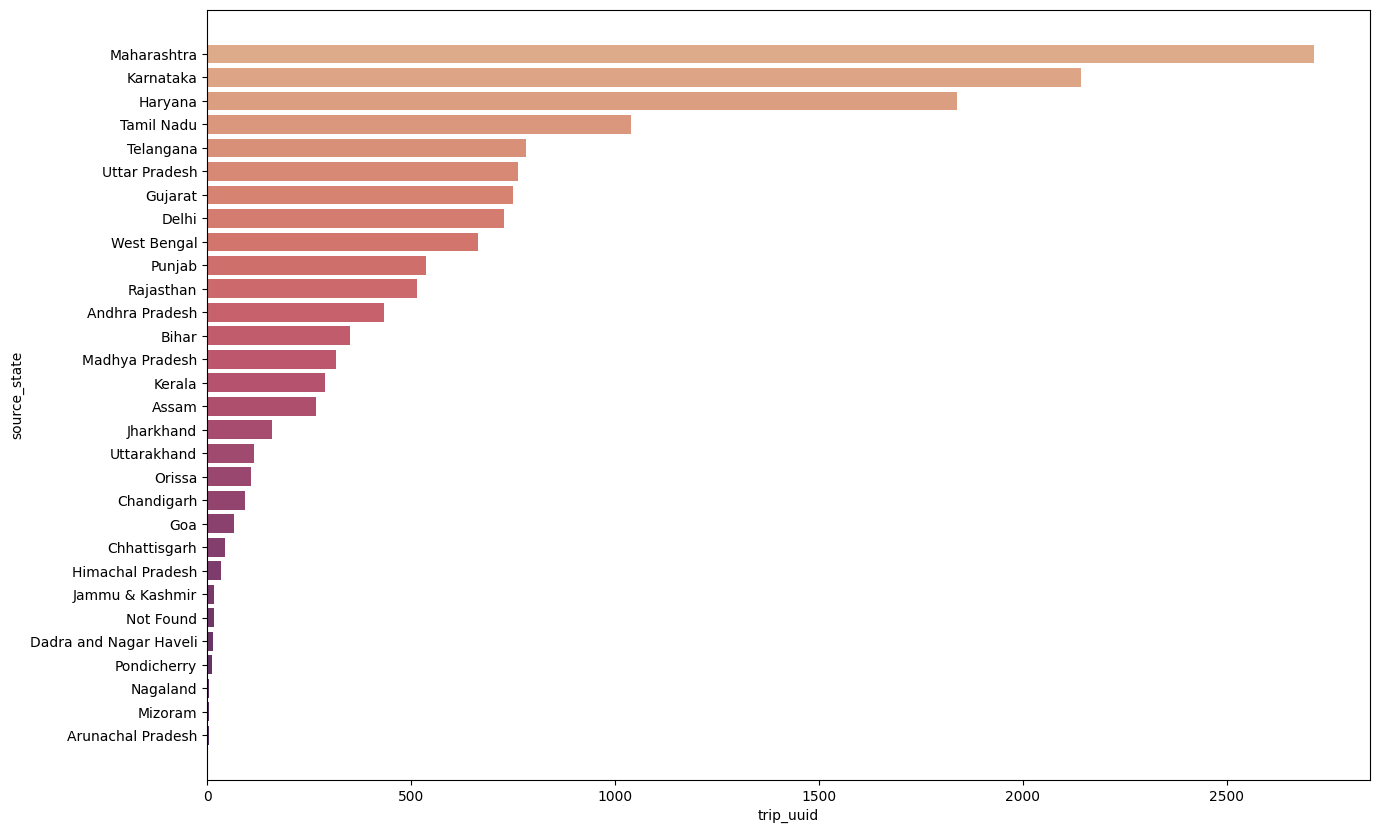

In [ ]:
plt.figure(figsize = (15, 10)) #setting the plot figure size
sns.barplot(data = df_source_state,
            x = df_source_state['trip_uuid'],
            y = df_source_state['source_state'], palette='flare') #plotting the source states against the trip uuid
plt.plot() #displaying the plot

It is observed that the maximum number of trips are originated from Maharashtra state followed by Karnataka and Haryana, which implies that the seller base is strong in these states

**No. of Trips created in each city**

In [ ]:
df_source_city = df2.groupby(by = 'source_city')['trip_uuid'].count().to_frame().reset_index()
df_source_city['percentage'] = np.round(df_source_city['trip_uuid'] * 100/ df_source_city['trip_uuid'].sum(), 2)
df_source_city = df_source_city.sort_values(by = 'trip_uuid', ascending = False)[:30]
df_source_city

,source_city,trip_uuid,percentage
439,Mumbai,1442,9.73
237,Gurgaon,1165,7.86
169,Delhi,883,5.96
79,Bengaluru,726,4.90
100,Bhiwandi,697,4.70
58,Bangalore,648,4.37
136,Chennai,568,3.83
264,Hyderabad,524,3.54
517,Pune,480,3.24
357,Kolkata,356,2.40


[]

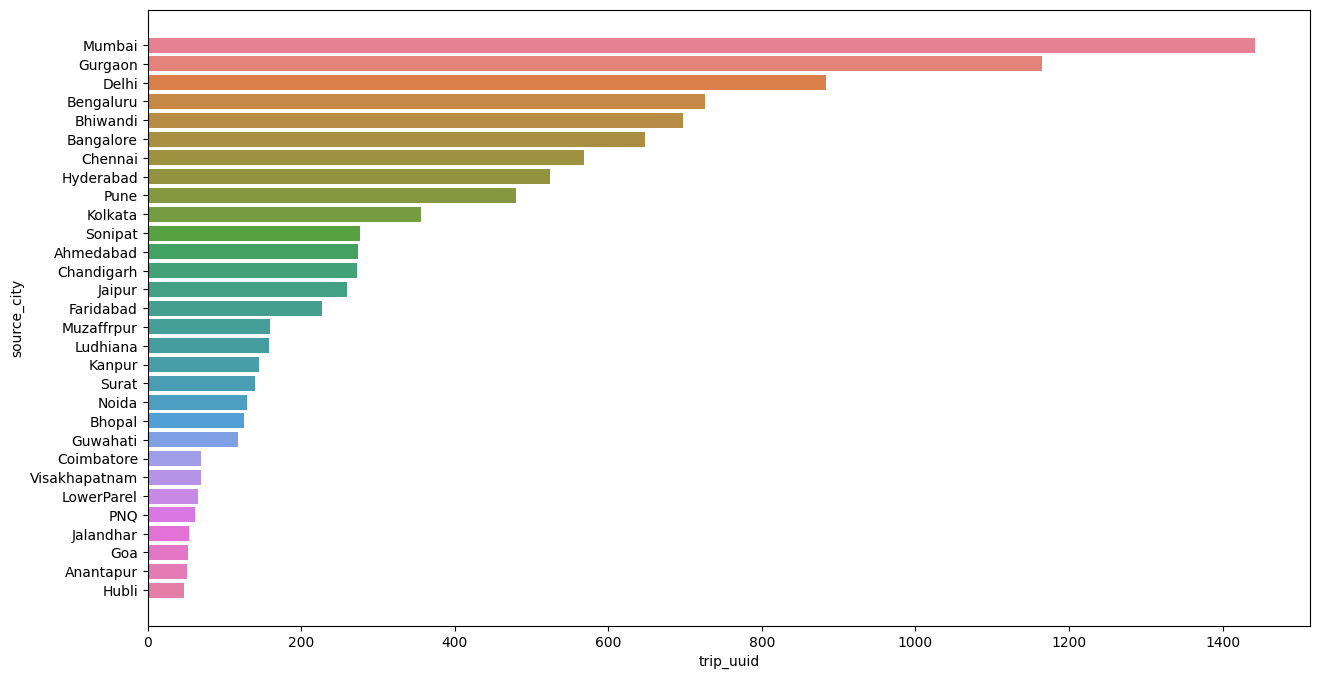

In [ ]:
plt.figure(figsize = (15, 8))
sns.barplot(data = df_source_city,
            x = df_source_city['trip_uuid'],
            y = df_source_city['source_city'], palette = 'husl')
plt.plot()

**No. of Trips ending in different states (Destination States)**

In [ ]:
# Grouping by 'destination_state' and count the number of 'trip_uuid' in each group
df_destination_state = df2.groupby(by='destination_state')['trip_uuid'].count().to_frame().reset_index()

# Calculating the percentage of trips for each destination state
df_destination_state['percentage'] = np.round(df_destination_state['trip_uuid'] * 100 / df_destination_state['trip_uuid'].sum(), 2)

# Sorting the data by trip count in descending order
df_destination_state = df_destination_state.sort_values(by='trip_uuid', ascending=False)

# Displaying the top states by trip count
df_destination_state.head()


,destination_state,trip_uuid,percentage
18,Maharashtra,2561,17.28
15,Karnataka,2294,15.48
11,Haryana,1643,11.09
26,Tamil Nadu,1084,7.32
29,Uttar Pradesh,811,5.47


[]

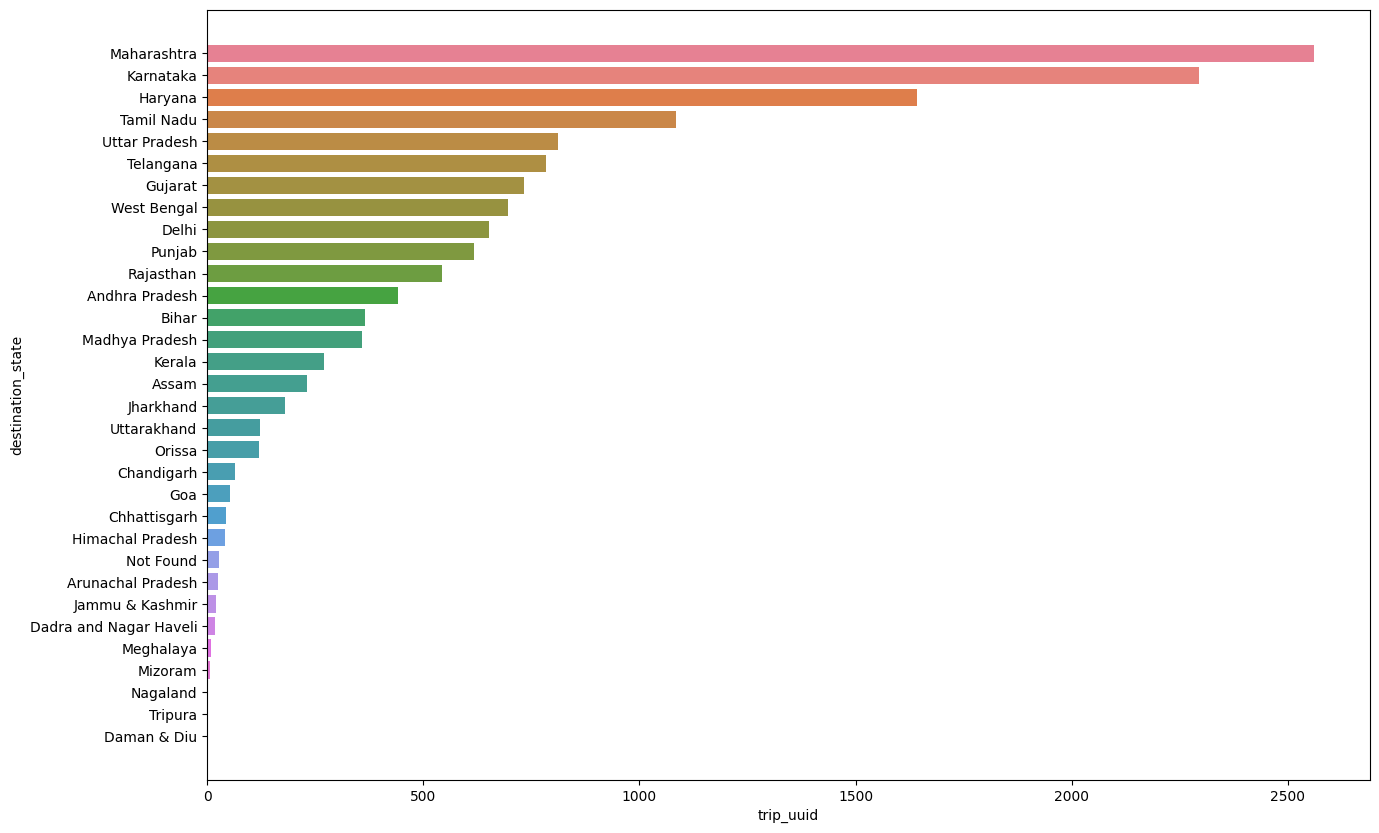

In [ ]:
plt.figure(figsize = (15, 10))
sns.barplot(data = df_destination_state,
            x = df_destination_state['trip_uuid'],
            y = df_destination_state['destination_state'], palette = 'husl')
plt.plot()

It is observed that maximum trips ended in Maharashtra state followed by Karnataka, Haryana, Tamil Nadu and Uttar Pradesh which implies that the number of orders placed in these states is significantly high.

**Top 10 cities with most trip endings**

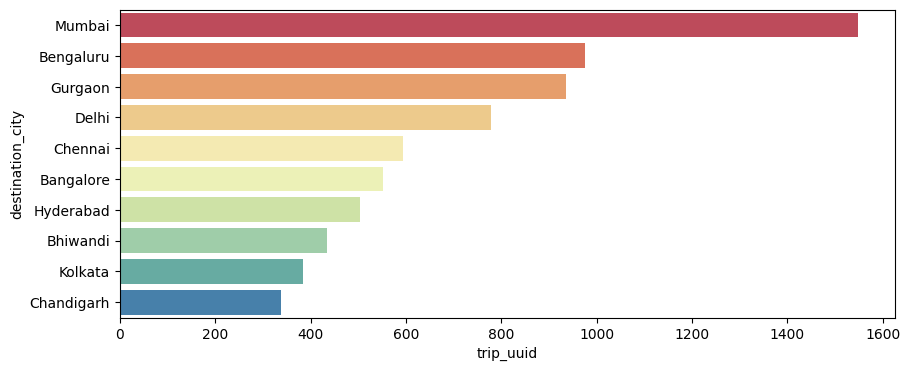

In [ ]:
# Grouping the data by 'destination_city' and counting the number of unique 'trip_uuid' per city
df_destination_city = df2.groupby(by='destination_city')['trip_uuid'].count().to_frame().reset_index()

# Sorting the DataFrame by 'trip_uuid' count in descending order
df_destination_city = df_destination_city.sort_values(by='trip_uuid', ascending=False)

# Selecting only the top 10 cities with the most trip counts
df_top_10_cities = df_destination_city.head(10)

# Plotting the top 10 cities
plt.figure(figsize=(10, 4))
sns.barplot(data=df_top_10_cities,
            x='trip_uuid',
            y='destination_city', palette='Spectral')

# Displaying the plot
plt.show()


It is clearly observed that number of orders placed in the cities Mumbau, Bengaluru, Gurgaon, Delhi are significantly high.



---
**Trend of orders on Week wise**


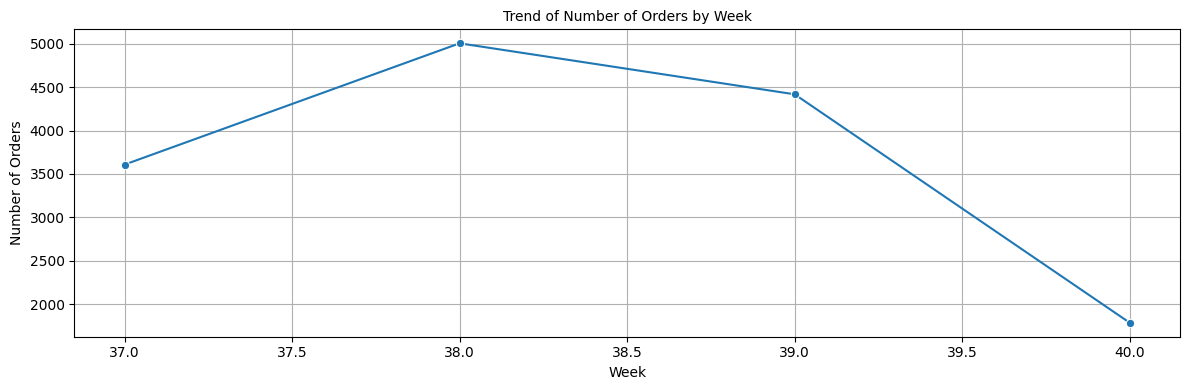

In [ ]:
# Plotting the trend of number of orders by Week
plt.figure(figsize=(12, 4))
df_week = df2.groupby(by='trip_creation_week')['trip_uuid'].count().reset_index()
sns.lineplot(data=df_week, x='trip_creation_week', y='trip_uuid', marker='o')
plt.title('Trend of Number of Orders by Week', fontsize=10)
plt.ylabel('Number of Orders')
plt.xlabel('Week')
plt.grid(True)
plt.tight_layout()
plt.show()



Most trips are created in thre *38th week*

**Trend of orders on Hour wise**


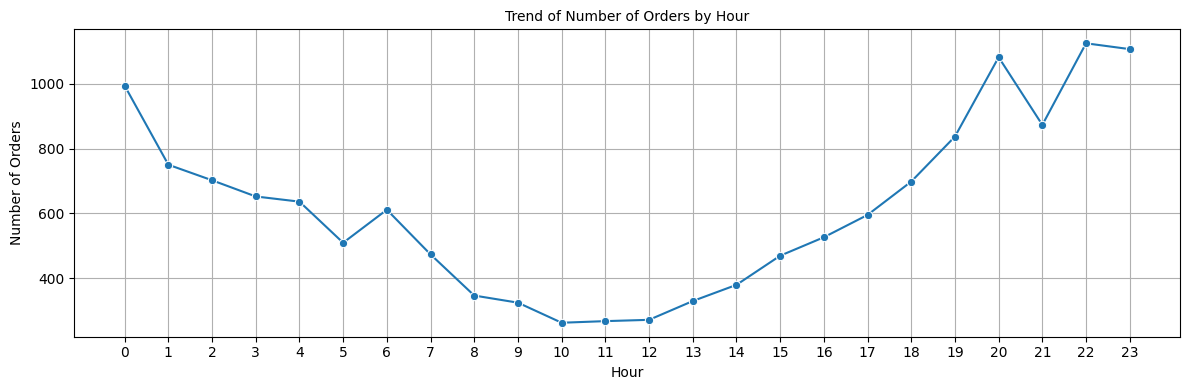

In [ ]:
# Plotting the trend of number of orders by Hour
plt.figure(figsize=(12, 4))
df_hour = df2.groupby(by='trip_creation_hour')['trip_uuid'].count().reset_index()
sns.lineplot(data=df_hour, x='trip_creation_hour', y='trip_uuid', marker='o')
plt.xticks(np.arange(0,24))
plt.title('Trend of Number of Orders by Hour', fontsize=10)
plt.ylabel('Number of Orders')
plt.xlabel('Hour')
plt.grid(True)
plt.tight_layout()
plt.show()


The trip creation is observed to be increasing from afternoon and and peaks around midnight (10PM - 12AM)

**Trend of orders on Day wise**


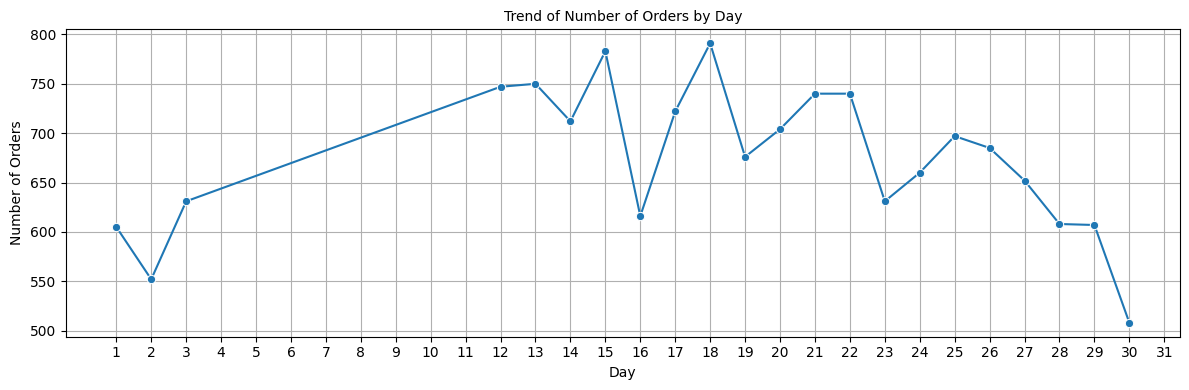

In [ ]:
# Plotting the trend of number of orders by Day (without grid lines)
plt.figure(figsize=(12, 4))
df_day = df2.groupby(by='trip_creation_day')['trip_uuid'].count().reset_index()
sns.lineplot(data=df_day, x='trip_creation_day', y='trip_uuid', marker='o')
plt.xticks(np.arange(1, 32))
plt.title('Trend of Number of Orders by Day', fontsize=10)
plt.ylabel('Number of Orders')
plt.xlabel('Day')
plt.grid(True)
plt.tight_layout()
plt.show()



A gradual increase from the initial days of the month can be seen. The trip creations peak in the  iddle of the month and gradually decreases in the later days.

**Pairwise relationships between multiple numerical variables**

[]

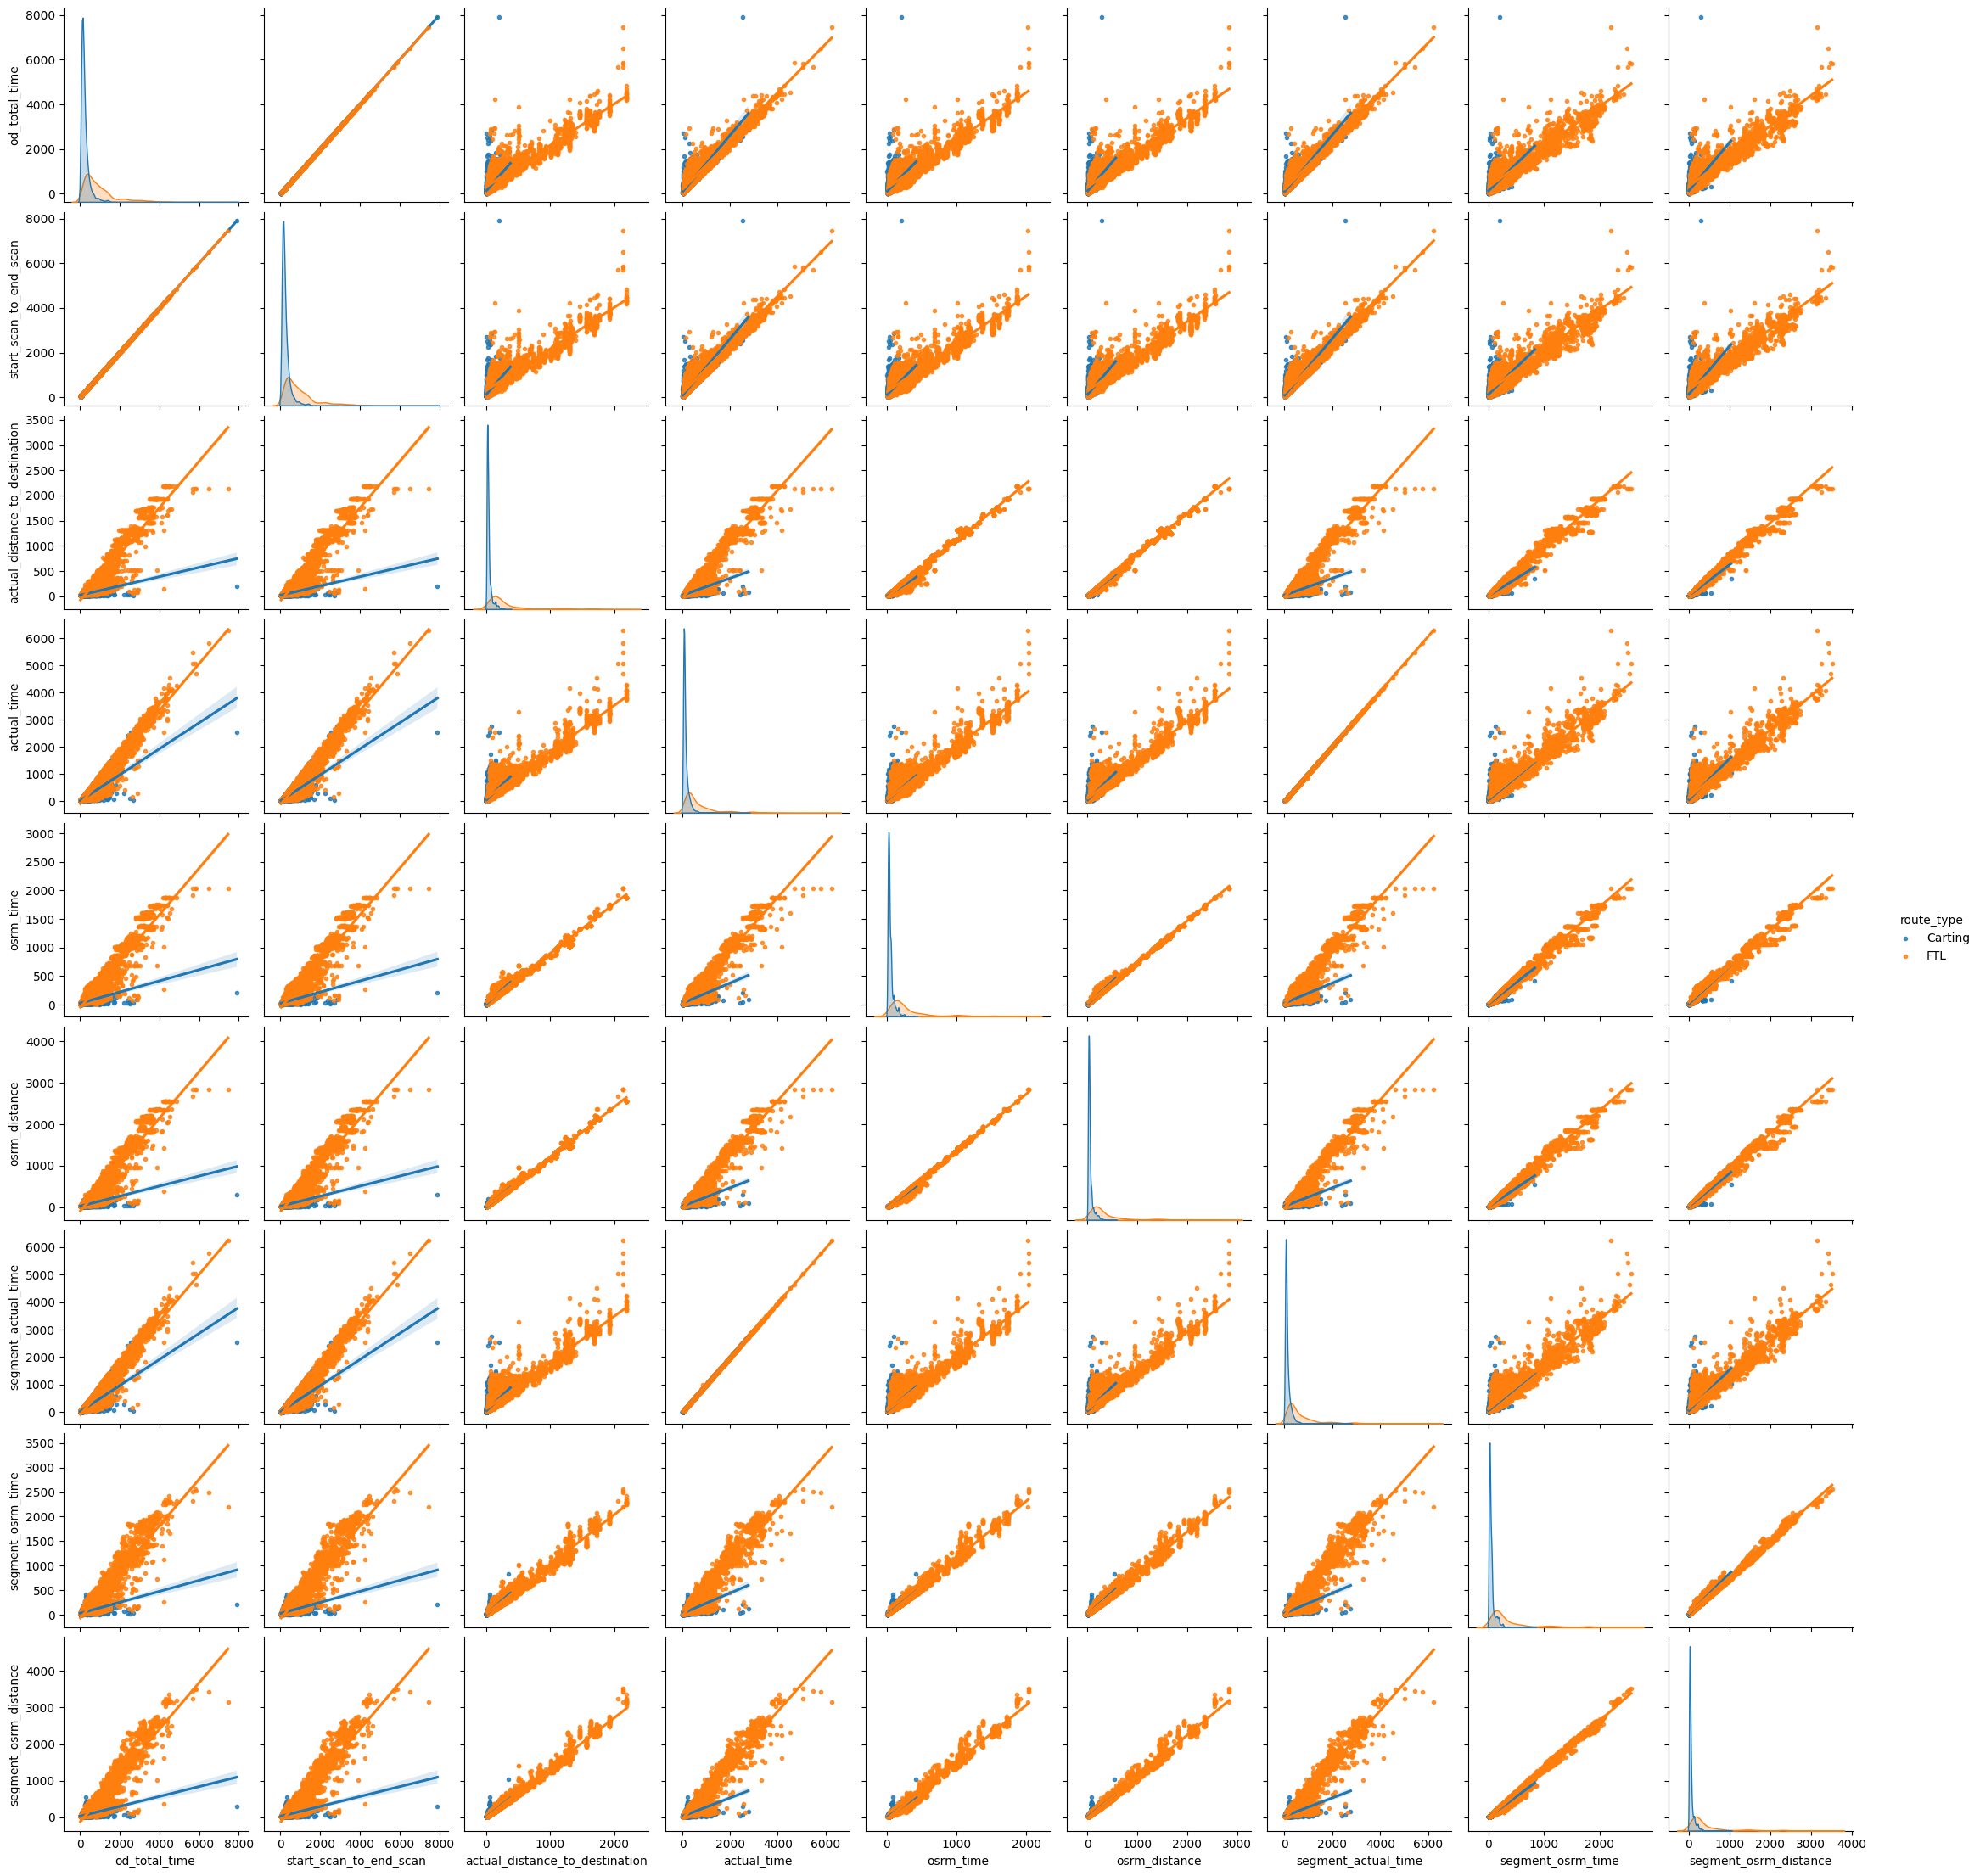

In [ ]:
#By using hue='route_type', we differentiate trends by route type, which helps in observing correlations
#or patterns between delivery times, distances, and other factors across different routes.
# Additionally, including regression lines (kind='reg') helps reveal linear relationships.

# Defining the list of numerical columns to include in the pairplot
numerical_columns = ['od_total_time', 'start_scan_to_end_scan', 'actual_distance_to_destination',
                     'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
                     'segment_osrm_time', 'segment_osrm_distance']

# Creating a Seaborn pairplot for the selected numerical columns
sns.pairplot(data=df2,              # The dataset to visualize
             vars=numerical_columns, # Variables for which relationships will be plotted
             kind='reg',             # Specifying regression lines in the scatter plots
             hue='route_type',       # Color code by route_type for differentiation
             markers='.')            # Using '.' as the marker for scatter points

# Displaying the plot
plt.plot()


**Observations based on the pairplot:**

- **Strong Linear Correlation:**
There is a noticeable strong linear correlation between various time and distance-related fields such as actual_time, osrm_time, segment_actual_time, and segment_osrm_time. This suggests that longer distances naturally correspond to longer travel times, regardless of route type.

- **Cluster Patterns by Route Type:**
 The data points are color-coded by route_type, and it seems both route types (carting and FTL) follow similar trends. However, there may be slight differences in spread or concentration for specific variables, which could be explored further.

- **Outliers**: Several variables have visible outliers, especially for higher values of actual_time, segment_actual_time, and od_total_time. These may represent exceptional trips or delays, and investigating these could provide insights into inefficiencies or unexpected delays.

The overall plot provides a good initial visualization of how key delivery time and distance metrics relate to one another.








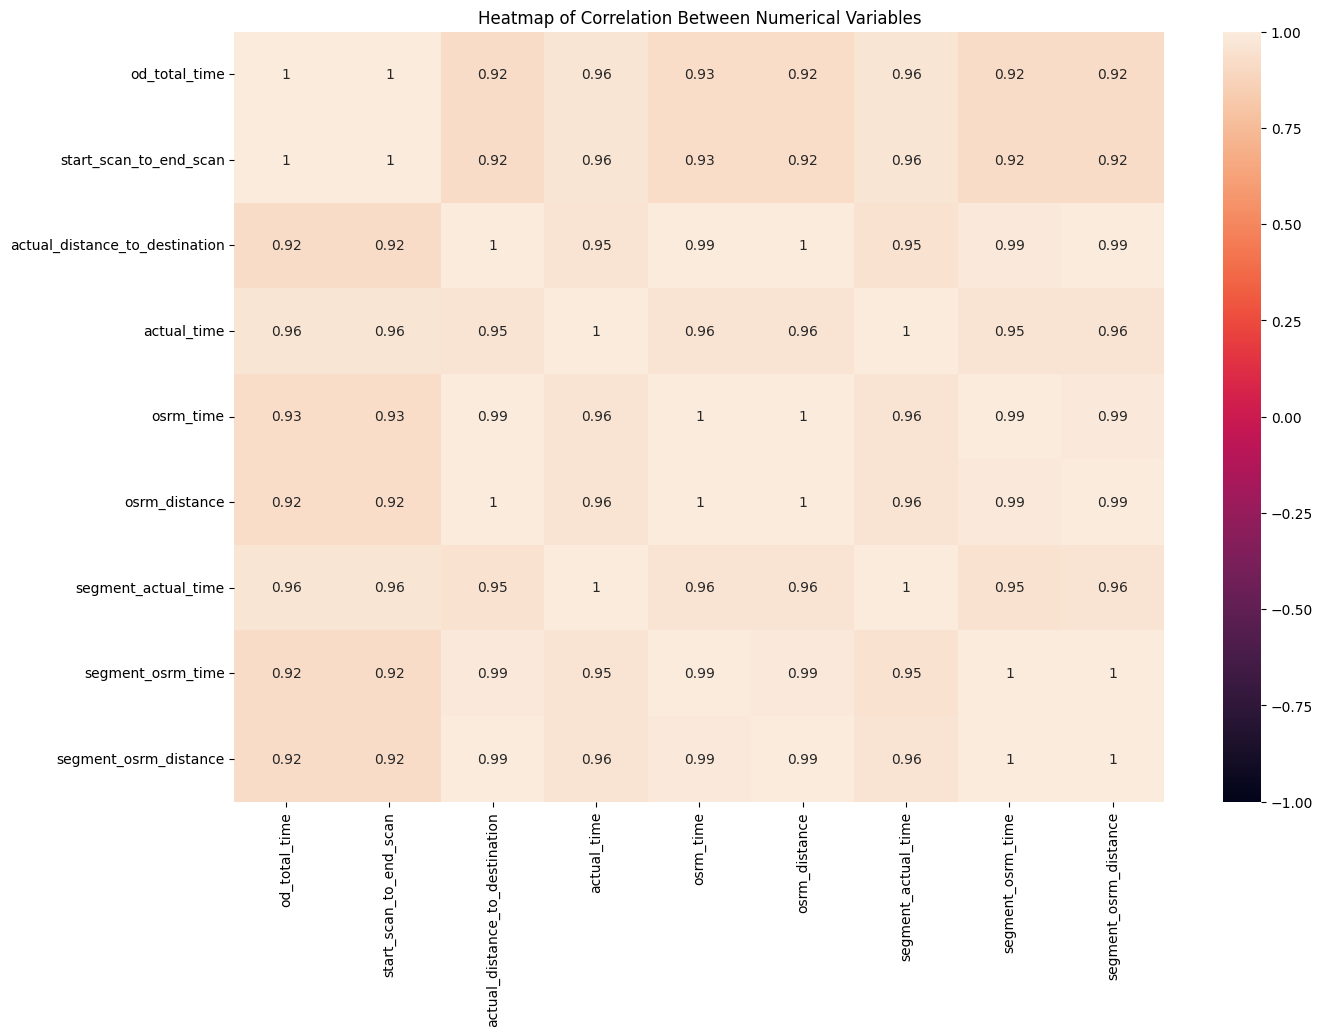

In [ ]:
# Computing correlation matrix
corr_matrix = df2[numerical_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(15, 10))  # Adjusting the figure size for better readability
sns.heatmap(data = corr_matrix, vmin = -1, vmax = 1, annot = True)
plt.title('Heatmap of Correlation Between Numerical Variables')
plt.show()

**Observations from the heatmap:**

**Strong Correlation**:
Almost all variables show strong positive correlations with each other, with values typically above 0.90. This indicates that as one variable increases, the other variables tend to increase as well.

**Perfect Correlation**:
The variables od_total_time and start_scan_to_end_scan are perfectly correlated with a correlation coefficient of 1. This suggests that these two variables might represent the same or very closely related measurements.

**OSRM Times and Distances:** The OSRM-related columns (osrm_time, osrm_distance, segment_osrm_time, and segment_osrm_distance) are highly correlated with each other and with the other travel time and distance columns. This is expected as OSRM estimates are designed to closely predict actual travel distances and times.

**High Correlation Between Actual and OSRM Values**: There is a high correlation between actual_distance_to_destination and osrm_distance (0.99), as well as between actual_time and osrm_time (0.96). This indicates that the OSRM predictions are very close to the actual travel measurements.

These high correlations suggest redundancy in some of the variables








# **Outlier Detection for numerical columns**

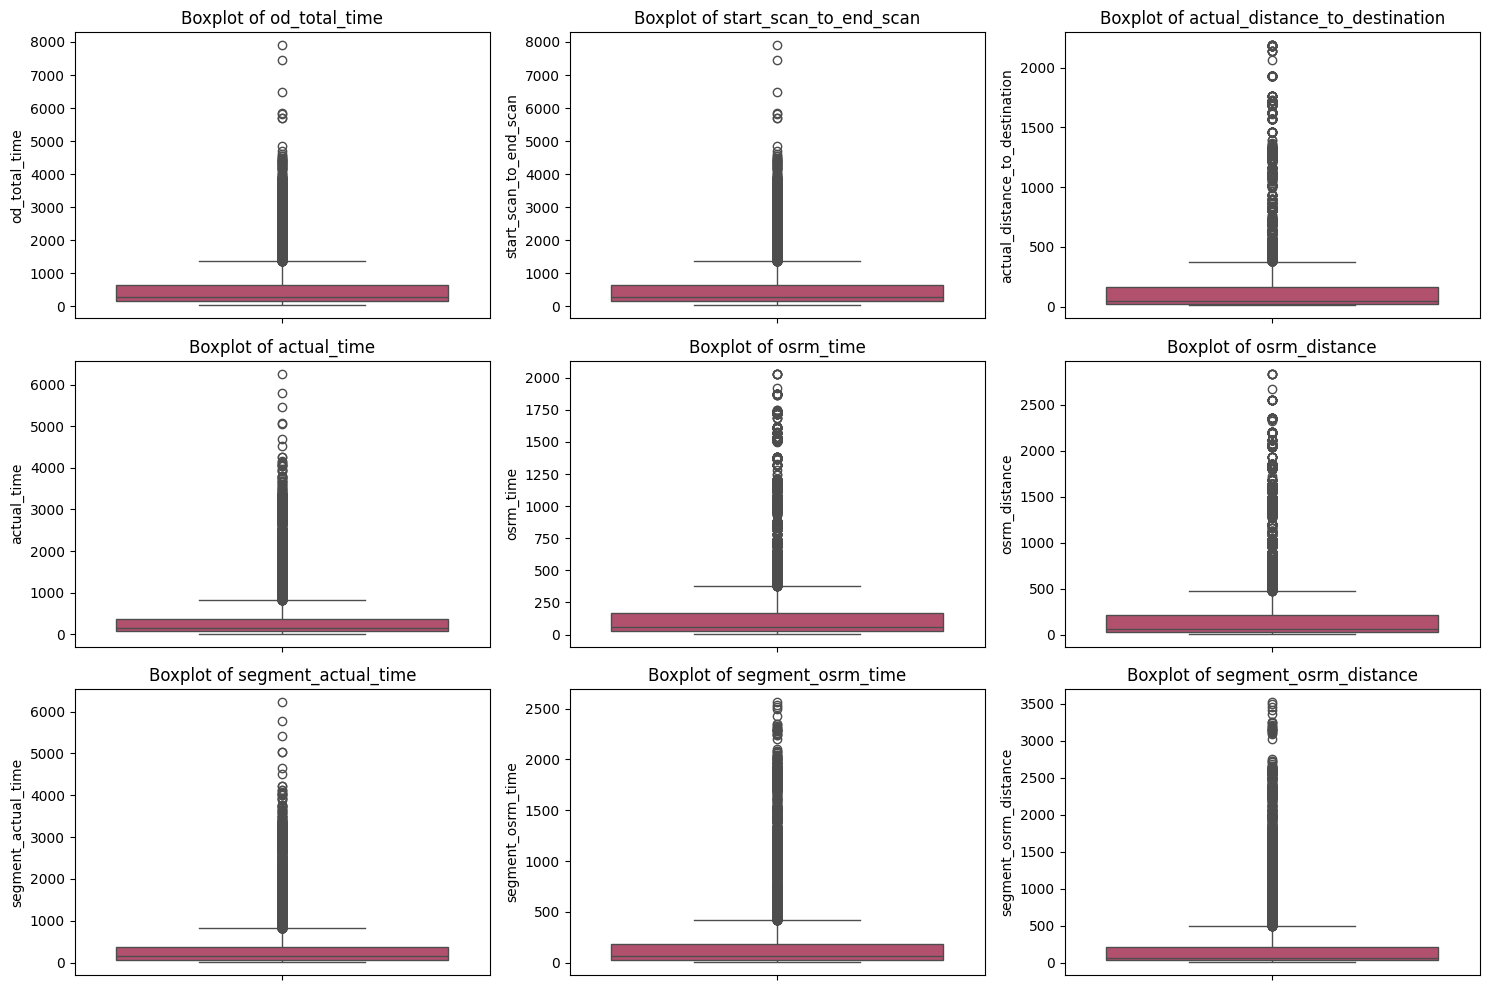

In [ ]:
# Plotting boxplots for each numerical column
plt.figure(figsize=(15, 10))  # Adjusting the figure size for better readability
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # Creating a subplot for each column
    sns.boxplot(data=df2, y=col, palette = 'flare')  # Creating a boxplot for the column
    plt.title(f'Boxplot of {col}')  # Setting the title of the subplot
    plt.tight_layout()
plt.show()  # Displaying the plots

In [ ]:
# Iterating through each numerical column in the DataFrame
for i in numerical_columns:
    # Calculating the first quartile (Q1) of the current column
    Q1 = np.quantile(df2[i], 0.25)
    # Calculating the third quartile (Q3) of the current column
    Q3 = np.quantile(df2[i], 0.75)
    # Calculating the Interquartile Range (IQR)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifying outliers in the current column based on the bounds
    outliers = df2.loc[(df2[i] < lower_bound) | (df2[i] > upper_bound)]

    # Printing the column name being analyzed
    print('Column :', i)
    # Printing the quartile values
    print(f'Q1 : {Q1}')
    print(f'Q3 : {Q3}')

    print(f'IQR : {IQR}') # Printing the Interquartile Range (IQR)

    # Printing the lower bound for outlier detection
    print(f'LB : {lower_bound}')
    # Printing the upper bound for outlier detection
    print(f'UB : {upper_bound}')

    # Printing the number of outliers detected in the current column
    print(f'Number of outliers : {outliers.shape[0]}')

    # Separator for readability in output
    print('----------------------------------')

Column : od_total_time
Q1 : 149.93
Q3 : 638.2
IQR : 488.27000000000004
LB : -582.4750000000001
UB : 1370.605
Number of outliers : 1266
----------------------------------
Column : start_scan_to_end_scan
Q1 : 149.0
Q3 : 637.0
IQR : 488.0
LB : -583.0
UB : 1369.0
Number of outliers : 1267
----------------------------------
Column : actual_distance_to_destination
Q1 : 22.837238311767578
Q3 : 164.5832061767578
IQR : 141.74596786499023
LB : -189.78171348571777
UB : 377.20215797424316
Number of outliers : 1449
----------------------------------
Column : actual_time
Q1 : 67.0
Q3 : 370.0
IQR : 303.0
LB : -387.5
UB : 824.5
Number of outliers : 1643
----------------------------------
Column : osrm_time
Q1 : 29.0
Q3 : 168.0
IQR : 139.0
LB : -179.5
UB : 376.5
Number of outliers : 1517
----------------------------------
Column : osrm_distance
Q1 : 30.81920051574707
Q3 : 208.47500610351562
IQR : 177.65580558776855
LB : -235.66450786590576
UB : 474.95871448516846
Number of outliers : 1524
-------------

# **In-depth analysis and feature engineering**

**1**. To compare the difference between **od_total_time** and
   **start_scan_to_end_scan**. To do hypothesis testing to check


---







**Setting up Null Hypothesis**

**Null Hypothesis ( Ho )** - od_total_time (Total Trip Time) and start_scan_to_end_scan (Expected total trip time) are same.

**Alternate Hypothesis ( Ha )** - od_total_time (Total Trip Time) and start_scan_to_end_scan (Expected total trip time) are different.




If the assumptions of T Test are met then we can proceed performing T Test for independent samples else we will perform the non parametric test equivalent to T Test for independent sample i.e., Mann-Whitney U rank test for two independent samples.


**We set our alpha to be 0.05**



    Based on p-value, we will accept or reject H0.
        p-val > alpha : Accept H0
        p-val < alpha : Reject H0



In [ ]:
df2[['od_total_time', 'start_scan_to_end_scan']].describe()

,od_total_time,start_scan_to_end_scan
count,14817.000000,14817.000000
mean,531.697630,530.809998
std,658.868223,658.705933
min,23.460000,23.000000
25%,149.930000,149.000000
50%,280.770000,280.000000
75%,638.200000,637.000000
max,7898.550000,7898.000000


**Distribution check**

[]

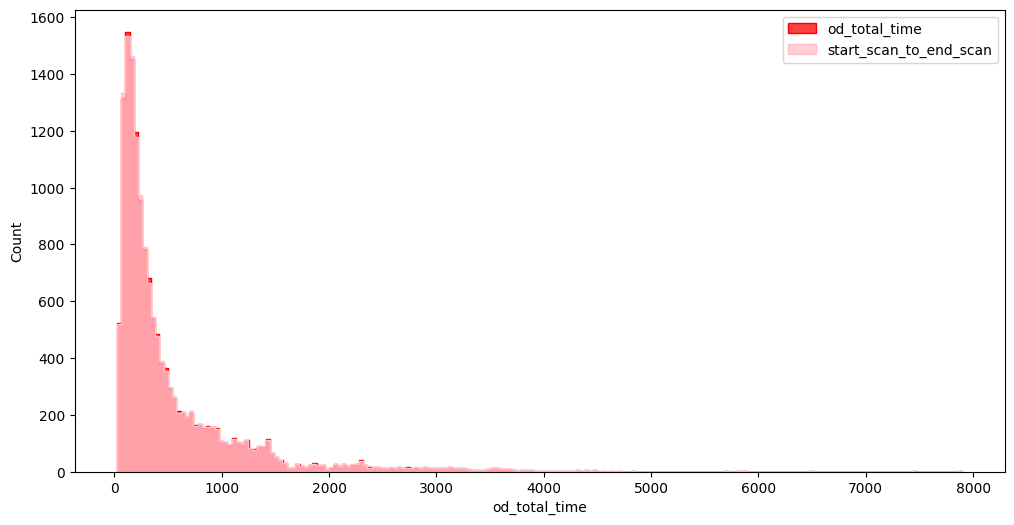

In [ ]:
# Creating a new figure with a specific size
plt.figure(figsize=(12, 6))

# Plotting a histogram for 'od_total_time' using a step element and red color
sns.histplot(df2['od_total_time'], element='step', color='red')

# Plotting a histogram for 'start_scan_to_end_scan' using a step element and pink color
sns.histplot(df2['start_scan_to_end_scan'], element='step', color='pink')

# Adding a legend to differentiate between the two histograms
plt.legend(['od_total_time', 'start_scan_to_end_scan'])

# Displaying the plot
plt.plot()

**Distribution check using QQ Plot**

[]

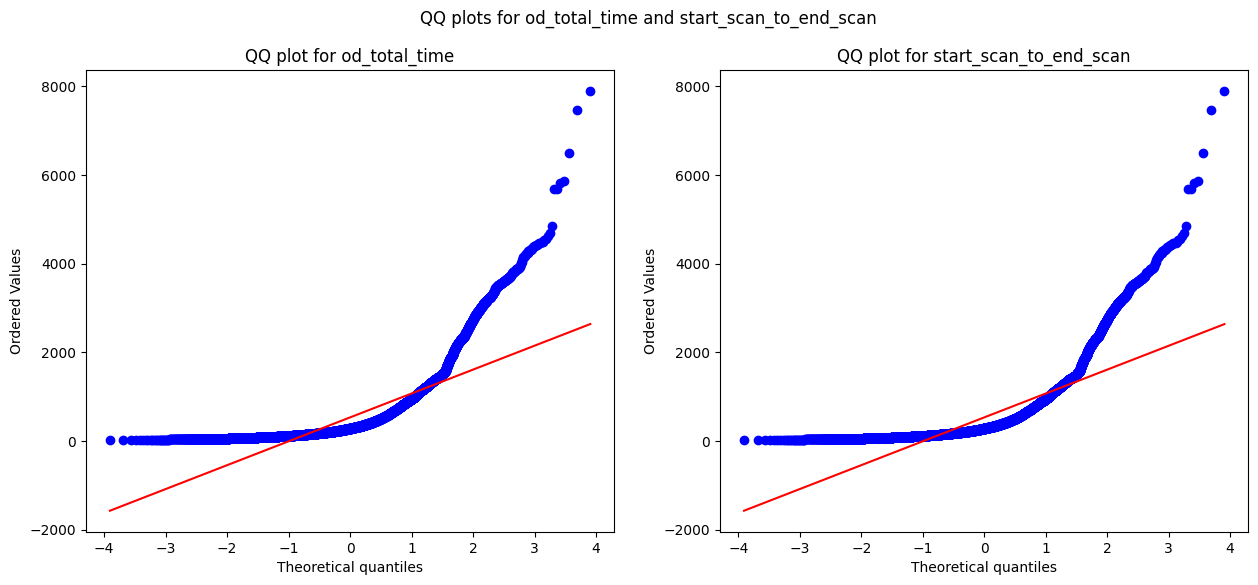

In [ ]:
# Creating a new figure with a specific size
plt.figure(figsize=(15, 6))

# Creating the first subplot for the QQ plot of 'od_total_time'
plt.subplot(1, 2, 1)

# Setting the overall title for the QQ plots
plt.suptitle('QQ plots for od_total_time and start_scan_to_end_scan')

# Generating a QQ plot for 'od_total_time' against a normal distribution
spy.probplot(df2['od_total_time'], plot=plt, dist='norm')
# Setting the title for the first subplot
plt.title('QQ plot for od_total_time')

# Creating the second subplot for the QQ plot of 'start_scan_to_end_scan'
plt.subplot(1, 2, 2)

# Generating a QQ plot for 'start_scan_to_end_scan' against a normal distribution
spy.probplot(df2['start_scan_to_end_scan'], plot=plt, dist='norm')

# Setting the title for the second subplot
plt.title('QQ plot for start_scan_to_end_scan')

# Display the plots
plt.plot()

It can be observed clearly from the above plots that the samples are not normally distributed.

**Applying Shapiro-Wilk test for normality**

---



**Null Hypothesis (Ho)**: The sample follows normal distribution

**Alternate Hypothesis (Ha)** : The sample does not follow normal distribution

**alpha** = 0.05

In [ ]:
# Performing Shapiro-Wilk test for normality on a sample of 'od_total_time'
test_stat, p_value = spy.shapiro(df2['od_total_time'].sample(5000))

# Printing the p-value
print('p-value', p_value)

# Checking if the p-value is less than the significance level (0.05)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 6.4466686267287365e-71
The sample does not follow normal distribution


In [ ]:
# Performing Shapiro-Wilk test for normality on a sample of 'start_scan_to_end_scan'
test_stat, p_value = spy.shapiro(df2['start_scan_to_end_scan'].sample(5000))

print('p-value', p_value)

p-value 1.5982669251413709e-72


Both the od_total_time and start_scan_to_end_scan doesn't follow Normal Distribution

Transforming the data using Boxcox Transformation to check if the transformed data follows normal distribution.

**Boxcox Transformation**

The Box-Cox transformation is applied to the 'od_total_time' and start_scan_to_end_scan data to stabilize variance and make the distribution more normal-like, which is often a prerequisite for many statistical analyses. The Shapiro-Wilk test is then conducted to assess the normality of the transformed data. This step is crucial because it helps determine whether parametric statistical methods can be appropriately used on the data.

In [ ]:
# Applying Box-Cox transformation to 'od_total_time' and store the transformed values
transformed_od_total_time = spy.boxcox(df2['od_total_time'])[0]

# Performing Shapiro-Wilk test for normality on the transformed sample
test_stat, p_value = spy.shapiro(transformed_od_total_time)

# Printing the p-value and check if the sample follows a normal distribution
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 7.5004520114099225e-25
The sample does not follow normal distribution


In [ ]:
transformed_start_scan_to_end_scan = spy.boxcox(df2['start_scan_to_end_scan'])[0]
test_stat, p_value = spy.shapiro(transformed_start_scan_to_end_scan)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.0520615562510275e-24
The sample does not follow normal distribution


Even after applying the boxcox transformation on both the "od_total_time" and "start_scan_to_end_scan" columns, the distributions do not follow normal distribution.

**Lavene's test**

The Levene's test is performed to assess the equality of variances between the two samples: 'od_total_time' and 'start_scan_to_end_scan'. Homogeneity of variance is an important assumption for many statistical tests, which require that the variances across groups be similar. By determining whether the samples have homogeneous variance, we can ensure the validity of subsequent analyses that rely on this assumption.

In [ ]:
#Null Hypothesis(Ho) - Homogenous Variance

#Alternate Hypothesis(Ha) - Non Homogenous Variance

# Performing Levene's test for homogeneity of variances between 'od_total_time' and 'start_scan_to_end_scan'
test_stat, p_value = spy.levene(df2['od_total_time'], df2['start_scan_to_end_scan'])

# Printing the p-value
print('p-value', p_value)

if p_value < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance')

p-value 0.9668020786253313
The samples have Homogenous Variance


Performing Mann Whitney U rank Test instead of T-Test as the samples don't follow normal distribution

**Mann Whitney U rank Test**

The Mann-Whitney U test is conducted to assess whether there is a significant difference between the distributions of od_total_time and start_scan_to_end_scan, particularly when the data may not meet the assumptions of normality. This non-parametric test provides insight into whether the two samples come from different populations, helping to inform further analysis or decision-making.

In [ ]:
# Performing the Mann-Whitney U test to compare the distributions of 'od_total_time' and 'start_scan_to_end_scan'
test_stat, p_value = spy.mannwhitneyu(df2['od_total_time'], df2['start_scan_to_end_scan'])

# Printing the p-value
print('P-value :', p_value)

if p_value > 0.05:
    print('od_total_time and start_scan_to_end_scan are similar.')
else:
    print('od_total_time and start_scan_to_end_scan are not similar')

P-value : 0.7815123224221716
od_total_time and start_scan_to_end_scan are similar.




---



---


**2**. Hypothesis test to check difference between **actual_time aggregated value and osrm_time aggregated value**

In [ ]:
df2[['actual_time', 'osrm_time']].describe()

,actual_time,osrm_time
count,14817.000000,14817.000000
mean,357.143768,161.384018
std,561.396118,271.360992
min,9.000000,6.000000
25%,67.000000,29.000000
50%,149.000000,60.000000
75%,370.000000,168.000000
max,6265.000000,2032.000000


**Checking for Distribution**

[]

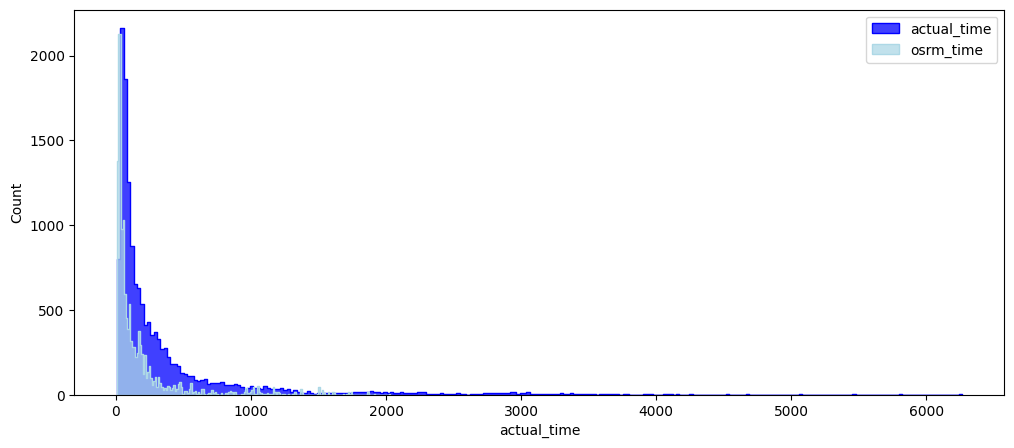

In [ ]:
plt.figure(figsize = (12, 5))
sns.histplot(df2['actual_time'], element = 'step', color = 'blue')
sns.histplot(df2['osrm_time'], element = 'step', color = 'lightblue')
plt.legend(['actual_time', 'osrm_time'])
plt.plot()

Distribution Check with **QQ Plots**



[]

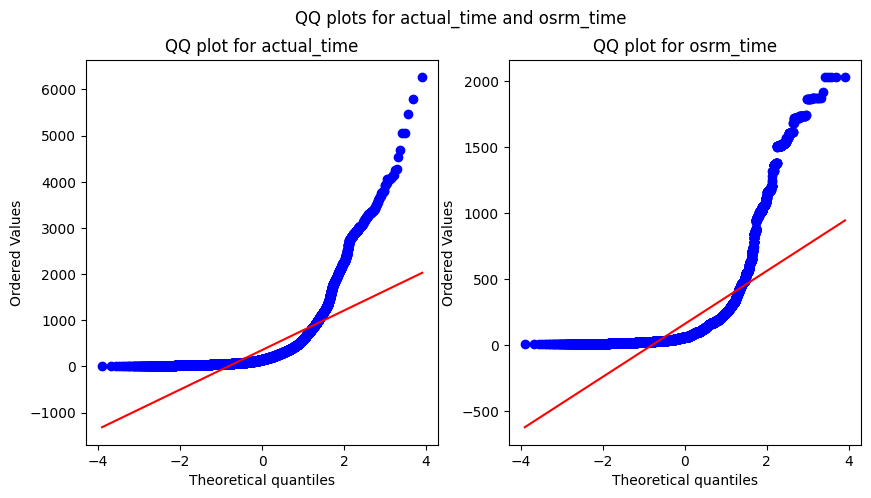

In [ ]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for actual_time and osrm_time')
spy.probplot(df2['actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for actual_time')
plt.subplot(1, 2, 2)
spy.probplot(df2['osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_time')
plt.plot()

It can be observed clearly from the above plots that the samples are not normally distributed.

---





---

Distribution check with **Shapiro Wilk Test**

In [ ]:
#Null Hypothesis (Ho) : The sample follows normal distribution
#Alternative Hypothesis (Ha) : The sample does not follow normal distribution

alpha = 0.05

test_stat, p_value = spy.shapiro(df2['actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 2.151018418687571e-76
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(df2['osrm_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 3.0458393619930825e-78
The sample does not follow normal distribution


**Boxcox Transformation**

In [ ]:
transformed_actual_time = spy.boxcox(df2['actual_time'])[0]
test_stat, p_value = spy.shapiro(transformed_actual_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.0587206011714705e-28
The sample does not follow normal distribution


In [ ]:
transformed_osrm_time = spy.boxcox(df2['osrm_time'])[0]
test_stat, p_value = spy.shapiro(transformed_osrm_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 3.5114710538974565e-35
The sample does not follow normal distribution


Even after applying the boxcox transformation on both the "actual_time" and "osrm_time" columns, the **distributions do not follow normal distribution**.



**Lavene's test**



In [ ]:
# Null Hypothesis(Ho) - Homogenous Variance

# Alternate Hypothesis(Ha) - Non Homogenous Variance

test_stat, p_value = spy.levene(df2['actual_time'], df2['osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 1.871098057987424e-220
The samples do not have  Homogenous Variance


Clearly T-Test cannot be  performed, we can perform its non parametric equivalent test i.e., **Mann-Whitney U rank test** for two independent samples.



---


**Mann-Whitney U rank test**



In [ ]:
test_stat, p_value = spy.mannwhitneyu(df2['actual_time'], df2['osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 0.0
The samples are not similar




---



---



**3**. Hypothesis testing/ visual analysis between **actual_time** aggregated value and **segment_actual_time** aggregated value

In [ ]:
df2[['actual_time', 'segment_actual_time']].describe()

,actual_time,segment_actual_time
count,14817.000000,14817.000000
mean,357.143768,353.892273
std,561.396118,556.247925
min,9.000000,9.000000
25%,67.000000,66.000000
50%,149.000000,147.000000
75%,370.000000,367.000000
max,6265.000000,6230.000000


**Visually Checking for Normal Distribution**

[]

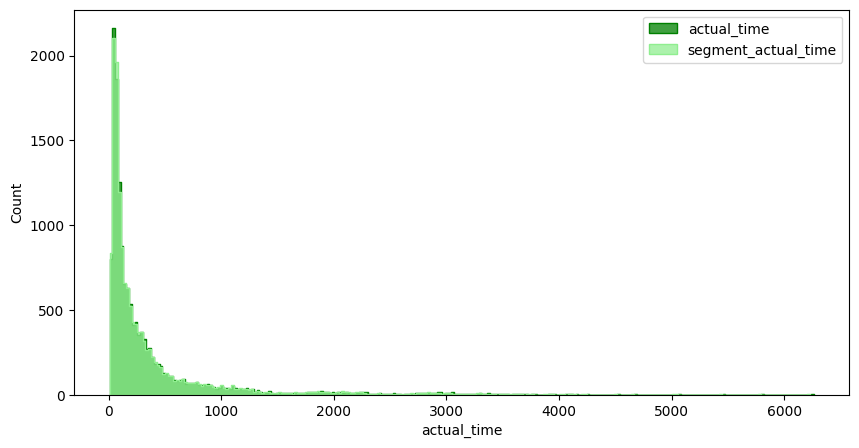

In [ ]:
plt.figure(figsize = (10, 5))
sns.histplot(df2['actual_time'], element = 'step', color = 'green')
sns.histplot(df2['segment_actual_time'], element = 'step', color = 'lightgreen')
plt.legend(['actual_time', 'segment_actual_time'])
plt.plot()

**QQ Plot**

[]

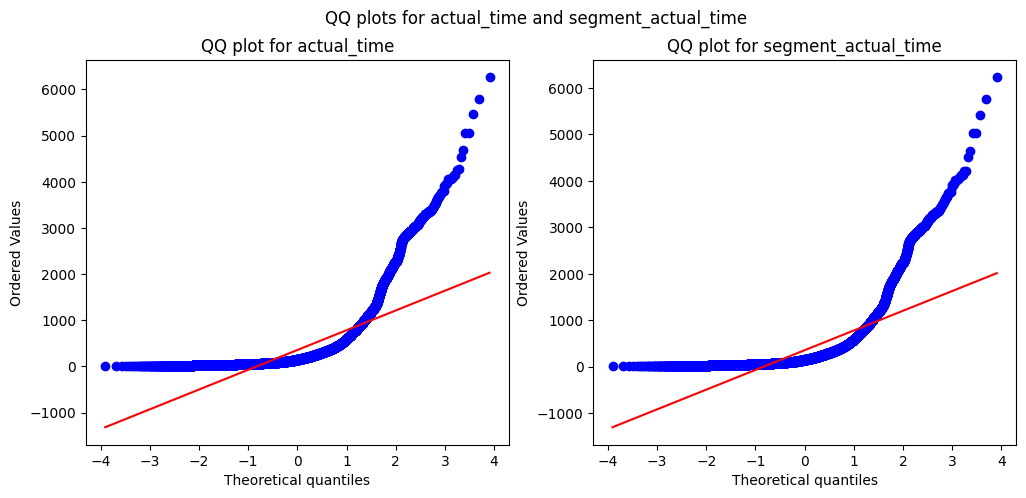

In [ ]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for actual_time and segment_actual_time')
spy.probplot(df2['actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for actual_time')
plt.subplot(1, 2, 2)
spy.probplot(df2['segment_actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_actual_time')
plt.plot()

It can be observed clearly from the above plots that the samples are not normally distributed.


**Shapiro Wilk Test**

In [ ]:
#Null Hypothesis (Ho) : The sample follows normal distribution
#Alternate Hypothesis (Ha) : The sample does not follow normal distribution

alpha = 0.05

test_stat, p_value = spy.shapiro(df2['actual_time'].sample(5000))
print('p-value', p_value)
if p_value < alpha:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 7.663930788056132e-77
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(df2['segment_actual_time'].sample(5000))
print('p-value', p_value)
if p_value < alpha:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 2.1195403618558515e-76
The sample does not follow normal distribution


The Samples don't follow Normal distribution

**Boxcox Transformation**

In [ ]:
test_stat, p_value = spy.shapiro(df2['segment_actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 4.2924880785521415e-76
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(df2['segment_actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.344047848835572e-76
The sample does not follow normal distribution


Even after applying the boxcox transformation the "actual_time" and "segment_actual_time" columns do not follow normal distribution.

**Lavene's test**

In [ ]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(df2['actual_time'], df2['segment_actual_time'])
print('p-value', p_value)

if p_value < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.695502241317651
The samples have Homogenous Variance 


Clearly T-Test cannot be performed, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

**Mann-Whitney U rank test**

In [ ]:
test_stat, p_value = spy.mannwhitneyu(df2['actual_time'], df2['segment_actual_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 0.4164235159622476
The samples are similar 


**4**. Hypothesis testing for **osrm_time** aggregated value and **segment_osrm_time** aggregated value

**Visual Analysis**

[]

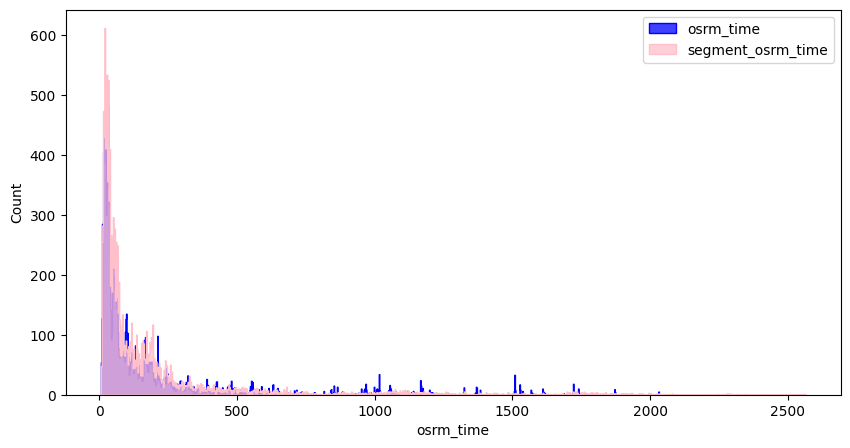

In [ ]:
plt.figure(figsize = (10, 5))
sns.histplot(df2['osrm_time'], element = 'step', color = 'blue', bins = 1000)
sns.histplot(df2['segment_osrm_time'], element = 'step', color = 'pink', bins = 1000)
plt.legend(['osrm_time', 'segment_osrm_time'])
plt.plot()

**QQ Plot** : Distribution Check

[]

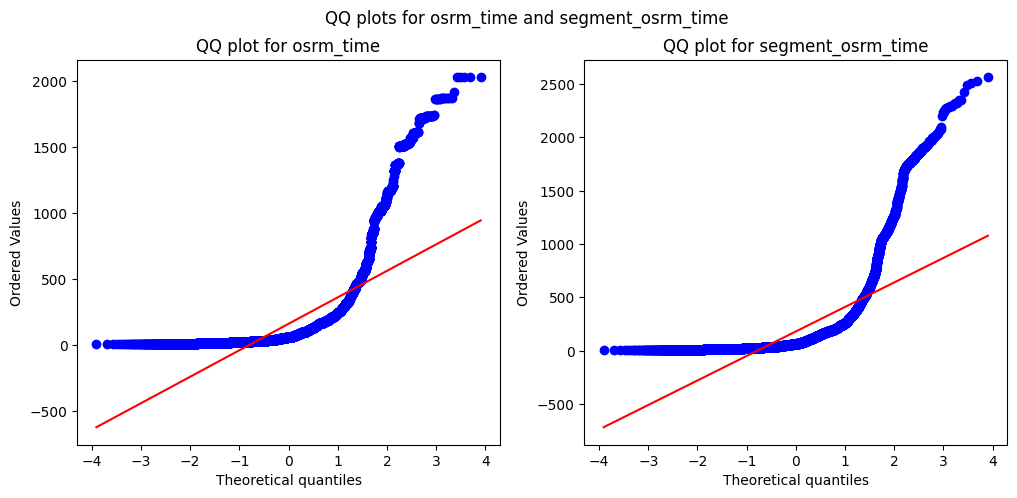

In [ ]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for osrm_time and segment_osrm_time')
spy.probplot(df2['osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_time')
plt.subplot(1, 2, 2)
spy.probplot(df2['segment_osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_osrm_time')
plt.plot()

**Shapiro Wilk Test** : Normality Check

In [ ]:
test_stat, p_value = spy.shapiro(df2['osrm_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 8.5652650258445e-78
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(df2['segment_osrm_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.0970262091172753e-78
The sample does not follow normal distribution


**Boxcox Transformation**

In [ ]:
transformed_osrm_time = spy.boxcox(df2['osrm_time'])[0]
test_stat, p_value = spy.shapiro(transformed_osrm_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 3.5114710538974565e-35
The sample does not follow normal distribution


In [ ]:
transformed_segment_osrm_time = spy.boxcox(df2['segment_osrm_time'])[0]
test_stat, p_value = spy.shapiro(transformed_segment_osrm_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 4.880441318638605e-34
The sample does not follow normal distribution


Even after applying the boxcox transformation the "osrm_time" and "segment_osrm_time" columns do not follow normal distribution.


**Lavene's Test**

In [ ]:
#Ho - Homogenous Variance

#Ha - Non Homogenous Variance

test_stat, p_value = spy.levene(df2['osrm_time'], df2['segment_osrm_time'])
print('p-value', p_value)

if p_value < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 8.349506135727595e-08
The samples do not have Homogenous Variance


Clearly T-Test cannot be performed, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

**Mann-Whitney U rank test**

In [ ]:
test_stat, p_value = spy.mannwhitneyu(df2['osrm_time'], df2['segment_osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 2.2995370859748865e-08
The samples are not similar




---



---



 **5**. Hypothesis testing between **osrm_distance** aggregated value and **segment_osrm_distance** aggregated value

**Visual Analysis**

[]

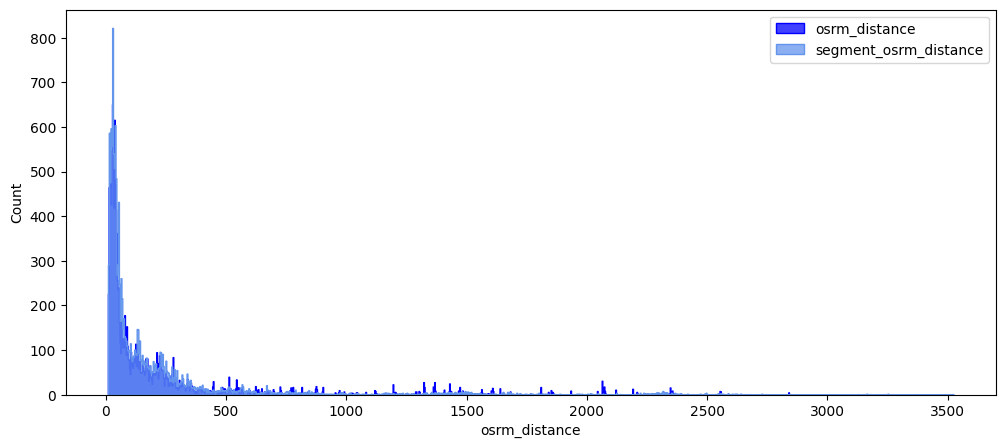

In [ ]:
plt.figure(figsize = (12, 5))
sns.histplot(df2['osrm_distance'], element = 'step', color = 'blue', bins = 1000)
sns.histplot(df2['segment_osrm_distance'], element = 'step', color = 'cornflowerblue', bins = 1000)
plt.legend(['osrm_distance', 'segment_osrm_distance'])
plt.plot()

**QQ Plot** - Distribution check

[]

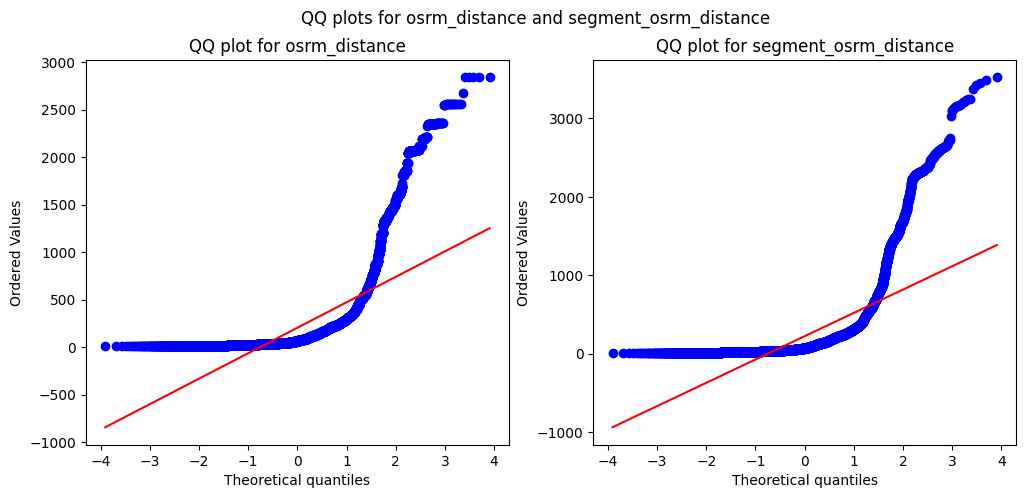

In [ ]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for osrm_distance and segment_osrm_distance')
spy.probplot(df2['osrm_distance'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_distance')
plt.subplot(1, 2, 2)
spy.probplot(df2['segment_osrm_distance'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_osrm_distance')
plt.plot()

It can be concluded that the samples do not follow normal distribution.

**Shapiro-Wilk** test for normality

In [ ]:
#Ho: The sample follows normal distribution
#Ha: The sample does not follow normal distribution

alpha = 0.05

test_stat, p_value = spy.shapiro(df2['osrm_distance'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.3198537606696945e-78
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(df2['segment_osrm_distance'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.2063727053974259e-79
The sample does not follow normal distribution


**Boxcox Transformation**

In [ ]:
transformed_osrm_distance = spy.boxcox(df2['osrm_distance'])[0]
test_stat, p_value = spy.shapiro(transformed_osrm_distance)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 7.095555476888255e-41
The sample does not follow normal distribution


In [ ]:
transformed_segment_osrm_distance = spy.boxcox(df2['segment_osrm_distance'])[0]
test_stat, p_value = spy.shapiro(transformed_segment_osrm_distance)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 3.052240944832899e-38
The sample does not follow normal distribution


Even after applying the boxcox transformation the "osrm_distance" and "segment_osrm_distance" columns do not follow normal distribution.




**Lavene's test**

In [ ]:
#Ho - Homogenous Variance

#Ha - Non Homogenous Variance

test_stat, p_value = spy.levene(df2['osrm_distance'], df2['segment_osrm_distance'])
print('p-value', p_value)

if p_value < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.00020976006524780905
The samples do not have Homogenous Variance


Clearly T-Test cannot be performed, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

**Mann-Whitney U rank test**

In [ ]:
test_stat, p_value = spy.mannwhitneyu(df2['osrm_distance'], df2['segment_osrm_distance'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 9.509410818847664e-07
The samples are not similar


# **One-hot encoding of categorical variables**

One-hot encoding transforms categorical variables into a numerical format that machine learning models can understand. Each unique category gets its own binary column (0 or 1). This ensures that the model treats categorical values without assuming any ordinal relationship between them, making it suitable for algorithms that expect numeric inputs.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['data', 'route_type']

# Initializing OneHotEncoder with sparse=False to return dense array (instead of sparse matrix)
ohe = OneHotEncoder(sparse=False)

# Fitting and transform the categorical columns into one-hot encoded format
encoded_cat_cols = ohe.fit_transform(df2[categorical_cols])
# Creating a DataFrame for the encoded categorical features with proper column names
categorical_encoded_df = pd.DataFrame(encoded_cat_cols, columns=ohe.get_feature_names_out(categorical_cols))

# Displaying the first few rows of the one-hot encoded DataFrame
display(categorical_encoded_df.head())

# Concatenating the original DataFrame (df2) with the newly one-hot encoded columns
encoded_df = pd.concat([df2, categorical_encoded_df], axis=1)

encoded_df.head()




,data_test,data_training,route_type_Carting,route_type_FTL
0,0.0,1.0,0.0,1.0
1,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,1.0
3,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,1.0


,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_total_time,start_scan_to_end_scan,...,trip_creation_date,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_hour,trip_creation_week,data_test,data_training,route_type_Carting,route_type_FTL
0,trip-153671041653548748,IND209304AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2260.11,2259.0,...,2018-09-12,-30,9,12,0,37,0.0,1.0,0.0,1.0
1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),181.61,180.0,...,2018-09-12,-30,9,12,0,37,0.0,1.0,1.0,0.0
2,trip-153671043369099517,IND000000ACB,IND000000ACB,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3934.36,3933.0,...,2018-09-12,-30,9,12,0,37,0.0,1.0,0.0,1.0
3,trip-153671046011330457,IND400072AAB,IND401104AAA,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.49,100.0,...,2018-09-12,-30,9,12,0,37,0.0,1.0,1.0,0.0
4,trip-153671052974046625,IND583101AAA,IND583119AAA,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),718.34,717.0,...,2018-09-12,-30,9,12,0,37,0.0,1.0,0.0,1.0



# Normalize/ Standardize the numerical features

# **Using MinMaxScaler**


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initializing the MinMaxScaler to scale the numerical features
min_max_scaler = MinMaxScaler()

# Applying the scaler to the numerical columns and transforming the values to a range of 0 to 1
min_max_scaled_numerical = min_max_scaler.fit_transform(df2[numerical_columns])

# Converting the scaled numerical features back into a DataFrame with the original column names
min_max_scaled_df = pd.DataFrame(min_max_scaled_numerical, columns=numerical_columns)

# Displaying the first few rows of the scaled data
min_max_scaled_df.head()


,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,0.284016,0.283937,0.374613,0.248242,0.350938,0.346972,0.247388,0.391712,0.373134
1,0.020082,0.019937,0.029476,0.021419,0.030602,0.026859,0.021218,0.023065,0.021373
2,0.496617,0.496508,0.880999,0.533568,0.855874,0.828325,0.530301,0.756450,0.721625
3,0.009781,0.009778,0.003753,0.007992,0.004442,0.003747,0.008037,0.003909,0.003074
4,0.088238,0.088127,0.054395,0.053069,0.054788,0.048647,0.053207,0.042611,0.039185


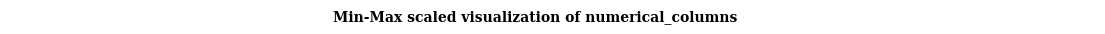

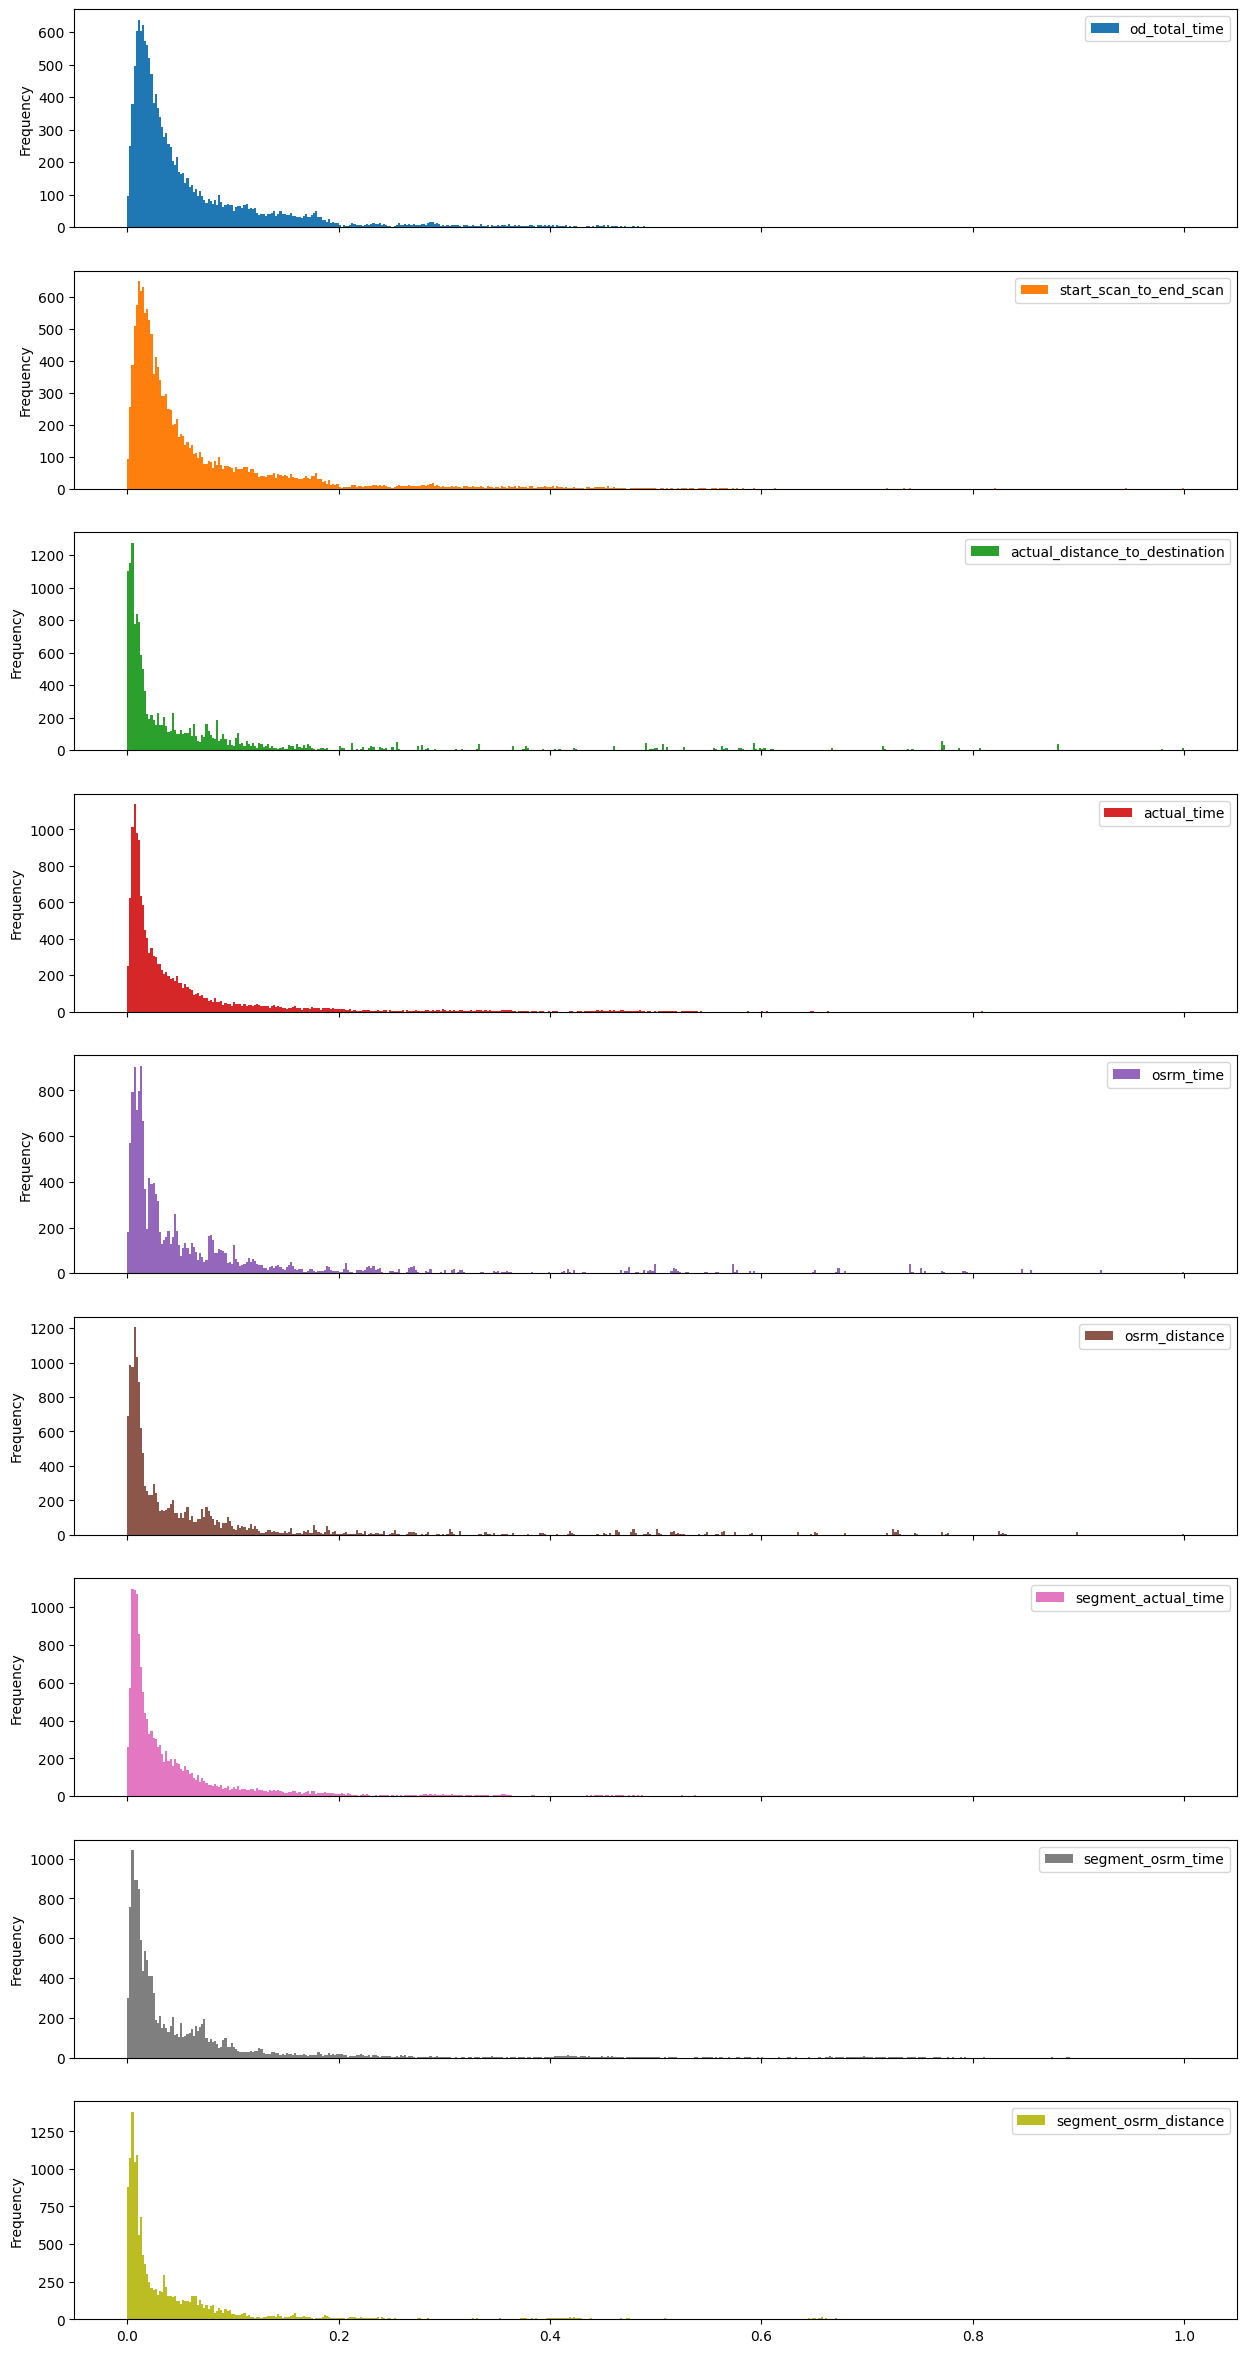

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Setting the figure size for the plot
plt.figure(figsize=(14, 0.05))

# Turning off the axes to avoid displaying unnecessary ticks or labels
plt.axis('off')

# Adding a title to the visualization
plt.suptitle(f'Min-Max scaled visualization of numerical_columns',
             fontfamily='serif', fontweight='bold', fontsize=10, color='black')

# Plotting the histogram for each numerical column in the min-max scaled DataFrame
min_max_scaled_df.plot(kind='hist', figsize=(15, 30), subplots=True, bins=500)

# Displaying the plot
plt.show()


# **Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#Since the data doesn't follow gaussian distribution,
# Standardizing the numerical features using StandardScaler
std_scaler = StandardScaler()
std_scaled = std_scaler.fit_transform(df2[numerical_columns])

# Converting the scaled features back to a dataframe
std_scaled_df = pd.DataFrame(std_scaled, columns=numerical_columns)
std_scaled_df.head()

,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,2.623394,2.623702,2.162092,2.146251,2.047585,2.124848,2.146791,2.629468,2.633784
1,-0.531365,-0.532593,-0.298944,-0.381461,-0.344144,-0.321920,-0.382742,-0.368643,-0.333670
2,5.164579,5.165134,5.772935,5.325931,5.817598,5.804050,5.310954,5.595785,5.573660
3,-0.654489,-0.654047,-0.482362,-0.531093,-0.539462,-0.498578,-0.530163,-0.524430,-0.488040
4,0.283287,0.282670,-0.121257,-0.028757,-0.163566,-0.155387,-0.024976,-0.209676,-0.183405


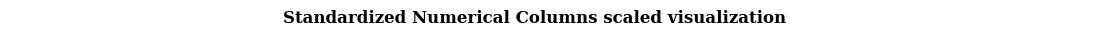

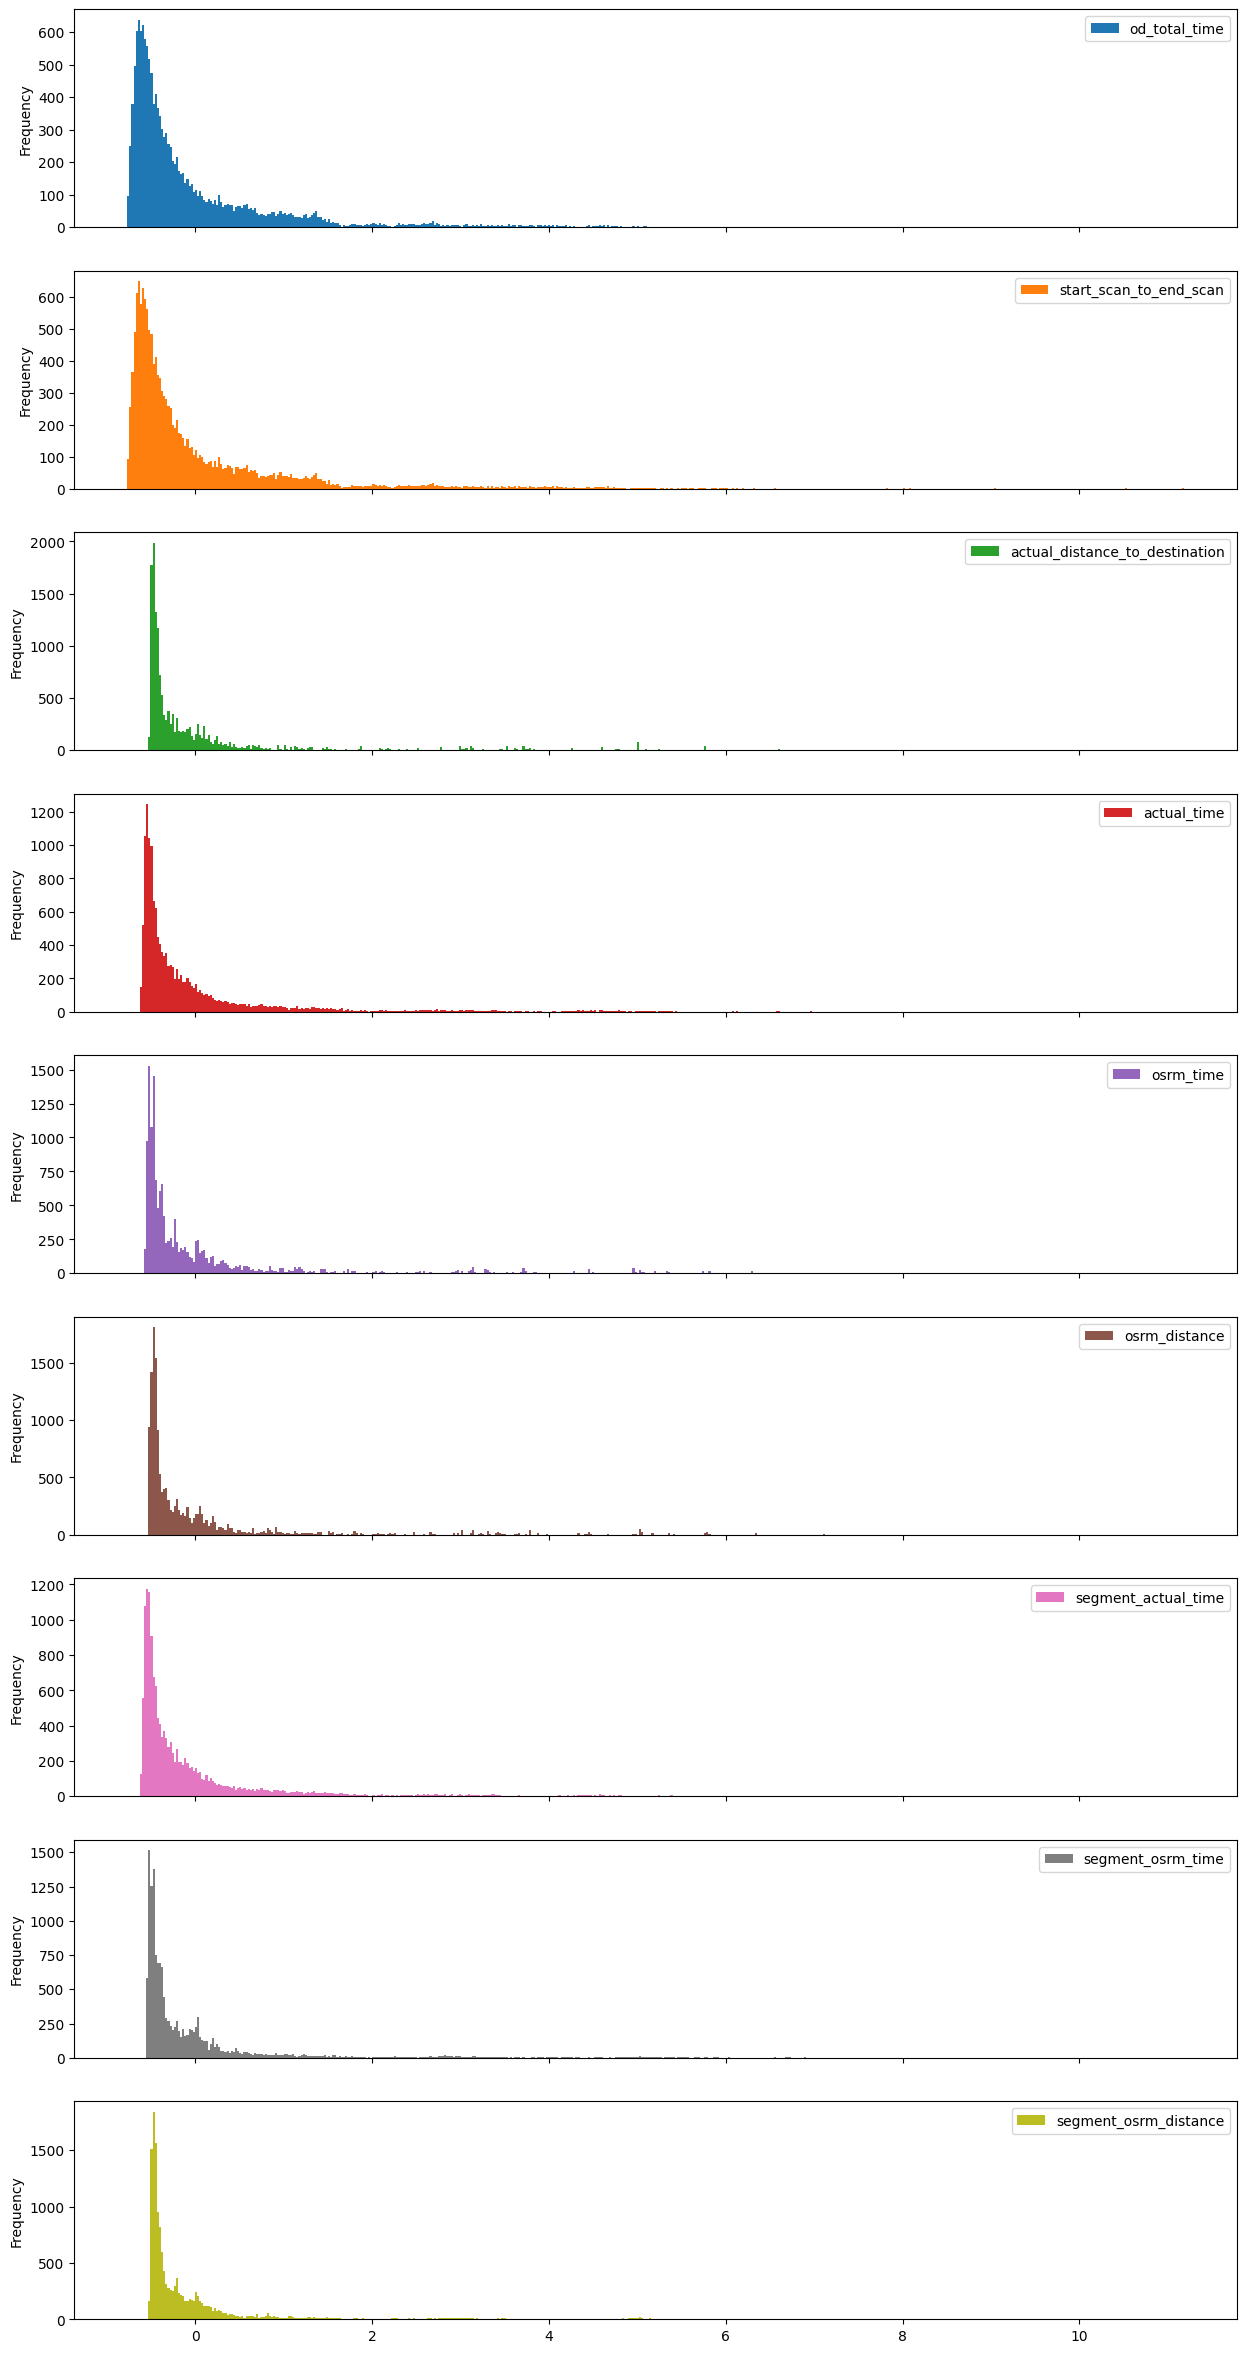

In [ ]:
plt.figure(figsize=(14,0.05))
plt.axis('off')
plt.suptitle(f'Standardized Numerical Columns scaled visualization',fontfamily='serif',fontweight='bold',fontsize=12, color='black')
std_scaled_df.plot(kind='hist', figsize=(15,30),subplots=True,bins=500)
plt.show()

# **Business Insights**

- The dataset spans from '2018-09-12 00:00:16' to '2018-10-08 03:00:24', covering about 14817 unique trip IDs.

- The peak of trip creation occurs around 10 P.M., with a noticeable increase after noon and a decline after midnight.

- Maximum trips originated from Mumbai, followed by cities like Gurgaon, Bengaluru, and Bhiwandi, indicating a robust seller base in these regions.

- A strong demand is observed in Maharashtra, Karnataka, and Haryana, with most trips ending in Mumbai, Bengaluru, and Chennai.

- Around 1508 unique source centers, 1481 unique destination centers, 690 unique source cities, and 806 unique destination cities are represented.

- The feature start_scan_to_end_scan and od_total_time show statistical similarity, while actual_time and osrm_time differ significantly.

- Mid-month sees the highest volume of orders, suggesting a monthly purchasing pattern by customers.

- The osrm_distance and segment_osrm_distance are statistically different, whereas start_scan_to_end_scan and segment_actual_time display similarity.

- There are missing entries for 14 unique location IDs in the data.

- Carting is the most frequent route type observed in the dataset.

- Most orders originate from Maharashtra, Karnataka, Haryana, Tamil Nadu, and Telangana.

- Trips spike during the 38th week, indicating a potential increase in operational or customer activity.

- Testing data is more abundant than training data in the set.

- The osrm_time and segment_osrm_time are not statistically identical.

# **Recommendations**

- With Karnataka being the busiest state in terms of route activity, focusing on streamlining the transportation system within this region would be highly beneficial. Utilizing real-time traffic data and advanced route optimization algorithms could help alleviate congestion and improve overall efficiency in the network.
- Since Gurgaon emerges as the top source city and Bangalore as the leading destination, developing specific strategies tailored to the needs of these cities could manage the heavy traffic flow and ensure smoother operations.
- The difference between the actual delivery times and OSRM (Open Source Routing Machine) times suggests that adjusting customer delivery expectations is necessary to offer more realistic time frames.
- Advanced demand prediction models should be adopted to preempt peak traffic hours and adjust operations accordingly, ensuring optimal use of resources and reduced delays during busy times.

- By offering more precise delivery time and distance estimates, companies can significantly boost customer satisfaction, leading to greater trust and loyalty.
- A faster, more reliable delivery system, particularly through FTL (Full Truck Load) shipments, can enhance customer experience as speedier deliveries are often prioritized by consumers.
- Understanding the behavior and preferences of customers in high-order states such as Maharashtra, Karnataka, Haryana, Tamil Nadu, and Uttar Pradesh will help businesses tailor their services to improve both the buying and delivery experience for these key regions.

- Analyzing discrepancies between estimated and actual times and distances can support cost reduction strategies, as more accurate predictions enable better resource management.
- Fine-tuning logistics to reflect actual distances can improve budget allocations, ensuring that transportation costs are optimized without unnecessary expenditures.

- The choice of FTL over traditional carting reflects a deliberate strategic move, likely aimed at improving delivery speed and efficiency. Continuously reviewing the performance of this decision and its impacts on business operations will help guide future strategy adaptations.

- Partnering with local stakeholders, including governmental bodies, transportation companies, and community organizations, can lead to more effective solutions for managing heavy traffic corridors. Collaborating to improve key transportation routes will benefit both businesses and local infrastructures